In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [16]:

%matplotlib inline

In [17]:
cd /Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift/

/Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift


In [18]:
series = pd.read_csv('train/subj3_series1_data.csv', index_col=0)
print(series.head())

                  Fp1  Fp2    F7   F3   Fz   F4   F8  FC5  FC1  FC2  ...   \
id                                                                   ...    
subj3_series1_0  1001   84  1103 -203  432  607   -1  678  498  193  ...    
subj3_series1_1   969   75  1086 -230  421  629    5  649  500  192  ...    
subj3_series1_2   960   28  1065 -247  444  600 -158  656  503  179  ...    
subj3_series1_3   975   48   999 -254  415  577  -32  640  515  178  ...    
subj3_series1_4   965   83  1053 -217  427  597   22  649  509  174  ...    

                  P7  P3   Pz   P4   P8   PO9   O1   Oz   O2  PO10  
id                                                                  
subj3_series1_0  614  10  311 -302 -538  1757  188  331 -279    96  
subj3_series1_1  467 -20  291 -322 -627  1788  188  319 -288   170  
subj3_series1_2  551  -5  305 -295 -545  1761  193  326 -311    86  
subj3_series1_3  529 -23  285 -312 -559  1735  204  313 -322    32  
subj3_series1_4  503 -12  270 -292 -556  1754 

In [19]:
events = pd.read_csv('train/subj3_series1_events.csv', index_col=0)
print(events.head())

                 HandStart  FirstDigitTouch  BothStartLoadPhase  LiftOff  \
id                                                                         
subj3_series1_0          0                0                   0        0   
subj3_series1_1          0                0                   0        0   
subj3_series1_2          0                0                   0        0   
subj3_series1_3          0                0                   0        0   
subj3_series1_4          0                0                   0        0   

                 Replace  BothReleased  
id                                      
subj3_series1_0        0             0  
subj3_series1_1        0             0  
subj3_series1_2        0             0  
subj3_series1_3        0             0  
subj3_series1_4        0             0  


In [20]:
# are there overlapping classes?
sum_events = events.sum(axis=1)

# if a row in the events data frame has sum greater than one,
# it means that more than one action is recorded at the same time
print("Number of rows where two events are happen simultaneously:", len(sum_events[sum_events == 2]))
print("Number of rows where three events are happen simultaneously:", len(sum_events[sum_events == 3]))
print("Number of rows where four events are happen simultaneously:", len(sum_events[sum_events == 4]))

Number of rows where two events are happen simultaneously: 5966
Number of rows where three events are happen simultaneously: 1296
Number of rows where four events are happen simultaneously: 0


In [21]:
# let's convert the events data frame to a single vector of events
# the encoding is the following
# 0: no action occurrs
# 1: HandStart
# 2: FirstDigitTouch
# 3: BothStartLoadPhase
# 4: LiftOff
# 5: Replace
# 6: BothReleased
# NOTE: What do we do with the overlapping classes?
# For now, I'm just going to take the first label
# For example, if 'BothStartLoadPhase' and 'Replace' are both 1 in one row,
# the row looks like [0, 0, 0, 1, 1, 0], but I will say that the label for
# the row is just 3 (BothStartLoadPhase)
num_samples = len(events)
labels = np.zeros(num_samples) # start with an array of all zeros
non_zero = np.any(events.values > 0, axis=1) # get a Boolean array indicating which rows have at least one 1
# the class label is the one plus the index of the first occurrence of 1
labels[non_zero] = (np.argmax(events.values, axis=1)[non_zero] + 1) 

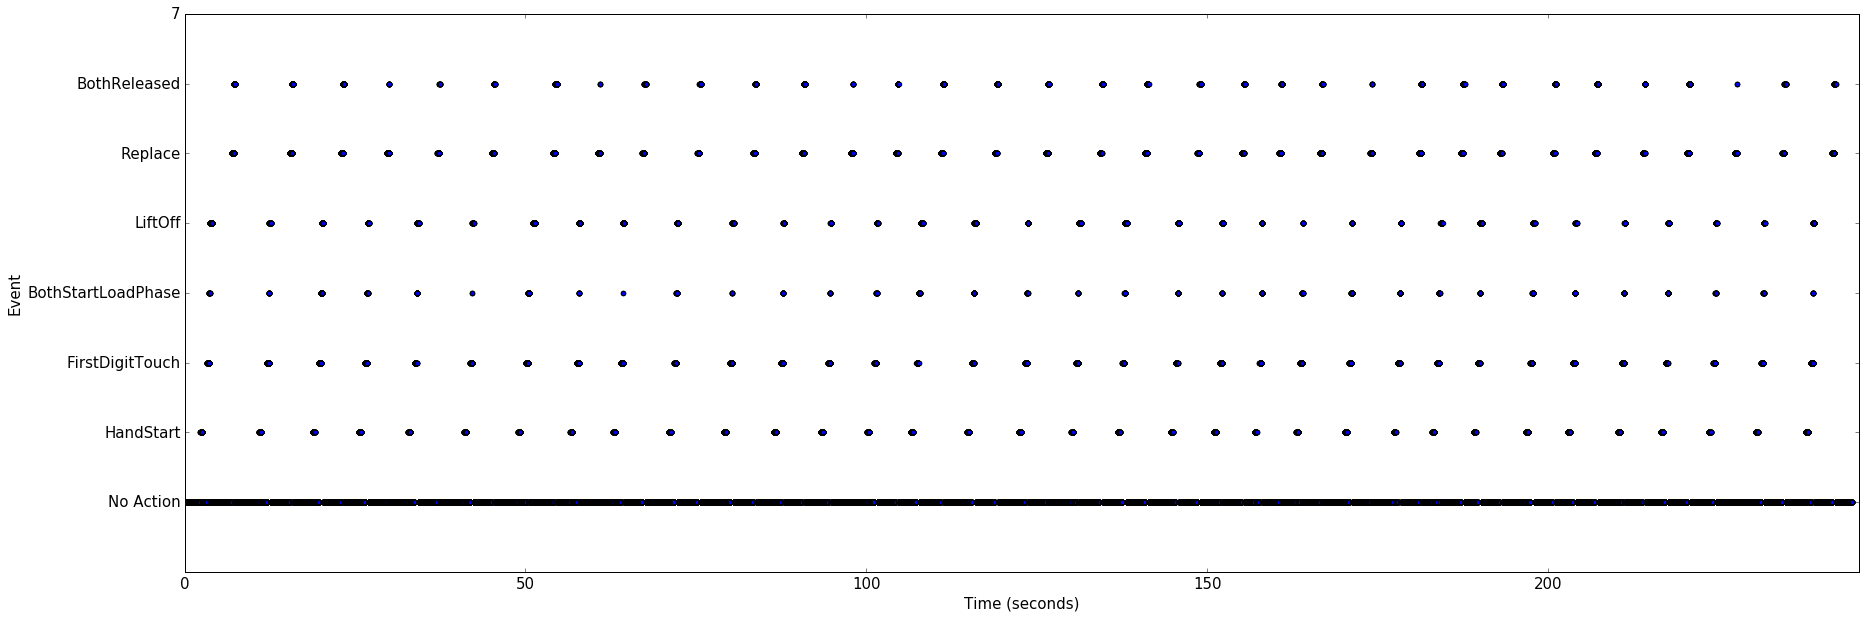

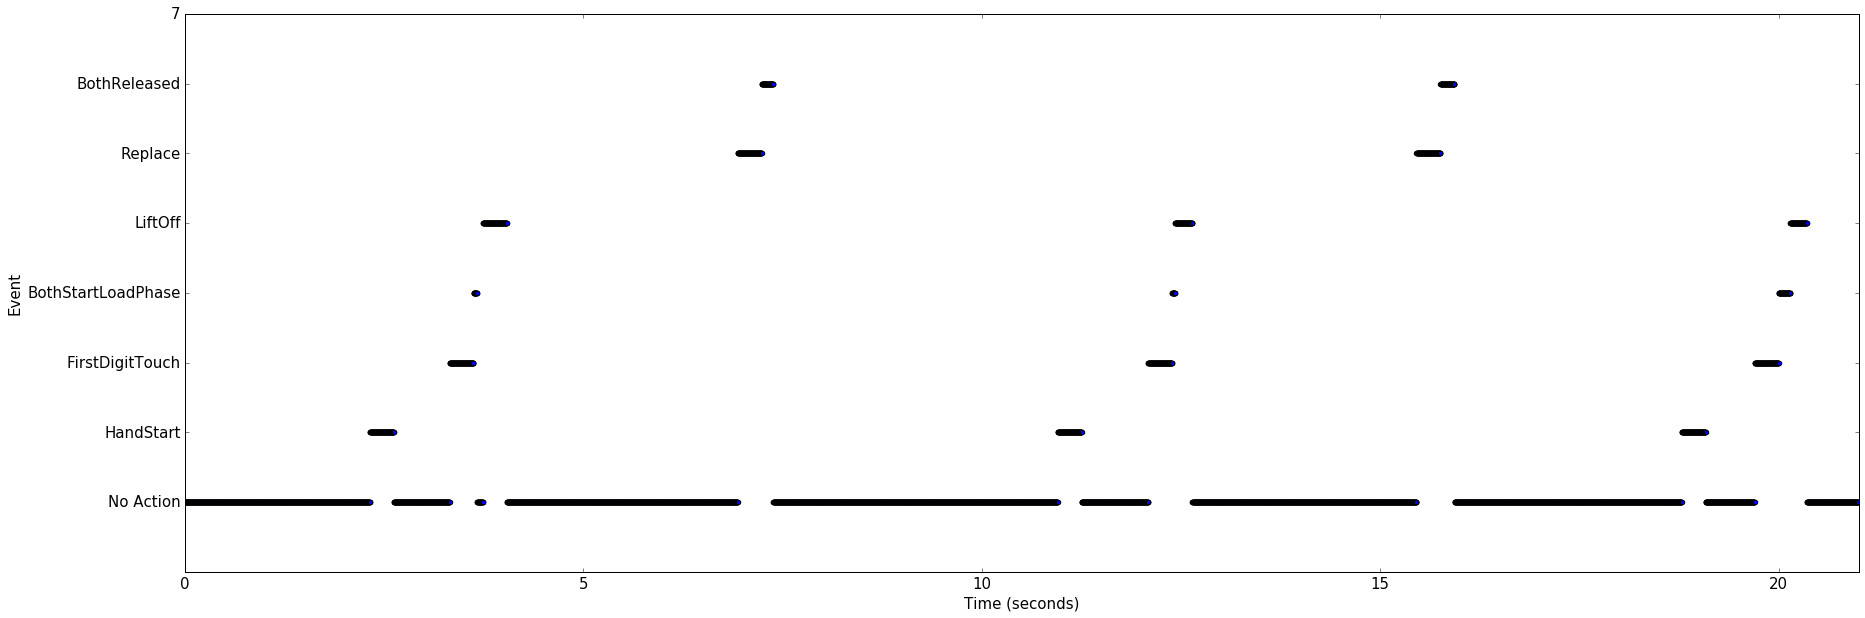

In [22]:
# OK. Let's plot it
sampling_rate = 500.
# prepare the x-axis. We divide by the sampling rate to get time in seconds
x_axis = np.arange(num_samples) / sampling_rate

# make font bigger
matplotlib.rcParams.update({'font.size': 15})

# full time series
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis, labels)
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.xlim(0, x_axis[-1] + 1)
locations = range(8)
names = ["No Action", "HandStart", "FirstDigitTouch", "BothStartLoadPhase", "LiftOff", "Replace", "BothReleased", "7"]
plt.yticks(locations, names)
plt.show()
plt.close()

# the first 21 seconds
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis[:10500], labels[:10500])
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.yticks(locations, names)
plt.xlim(0, 21)
plt.show()
plt.close()


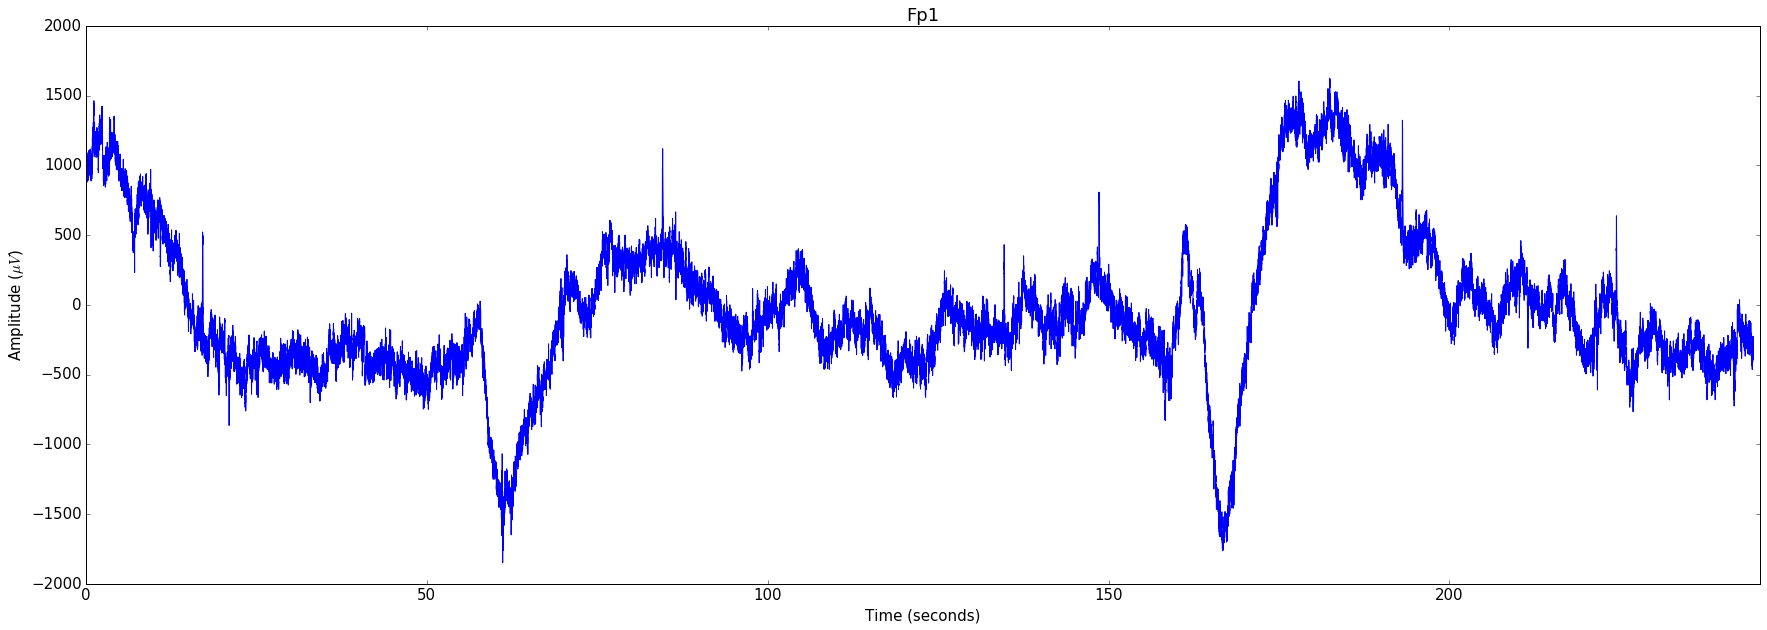

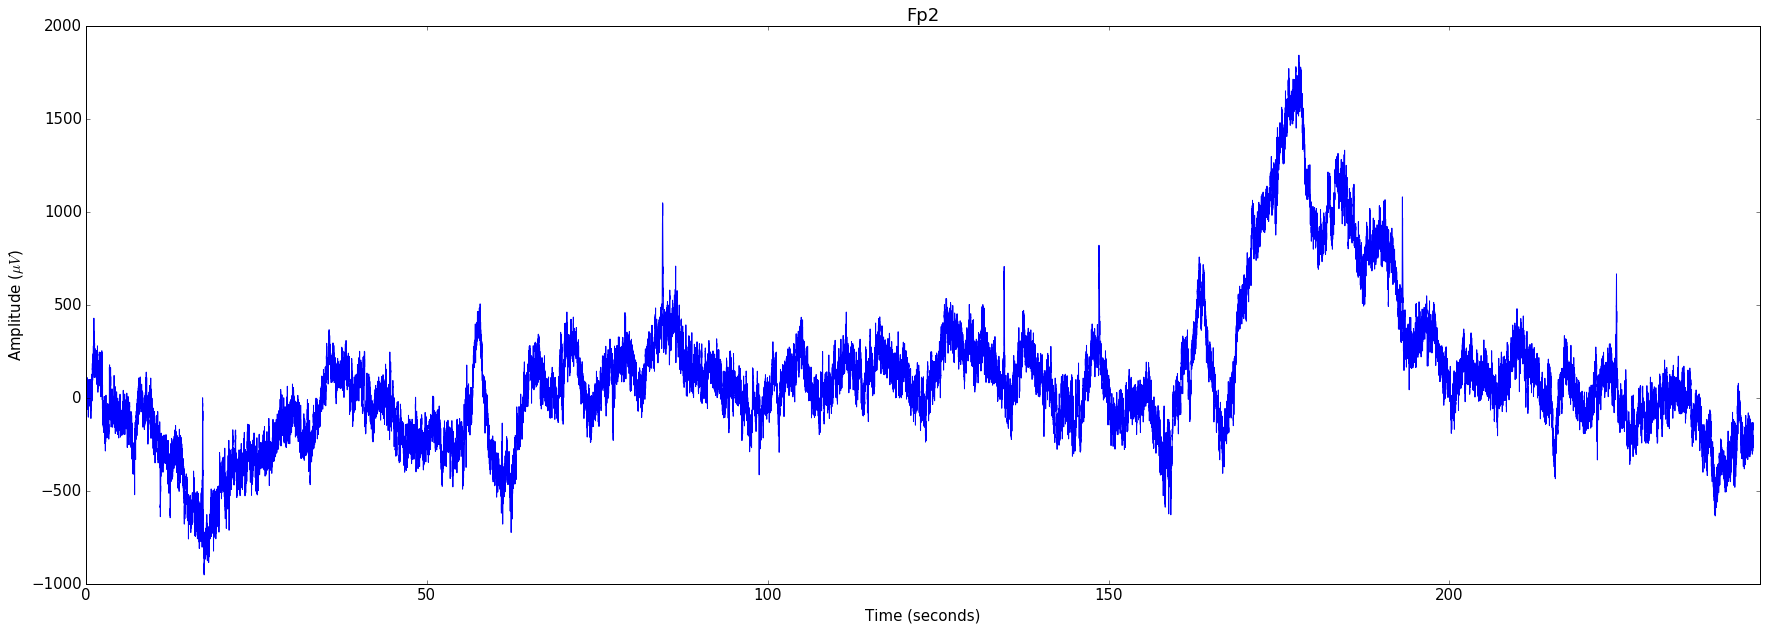

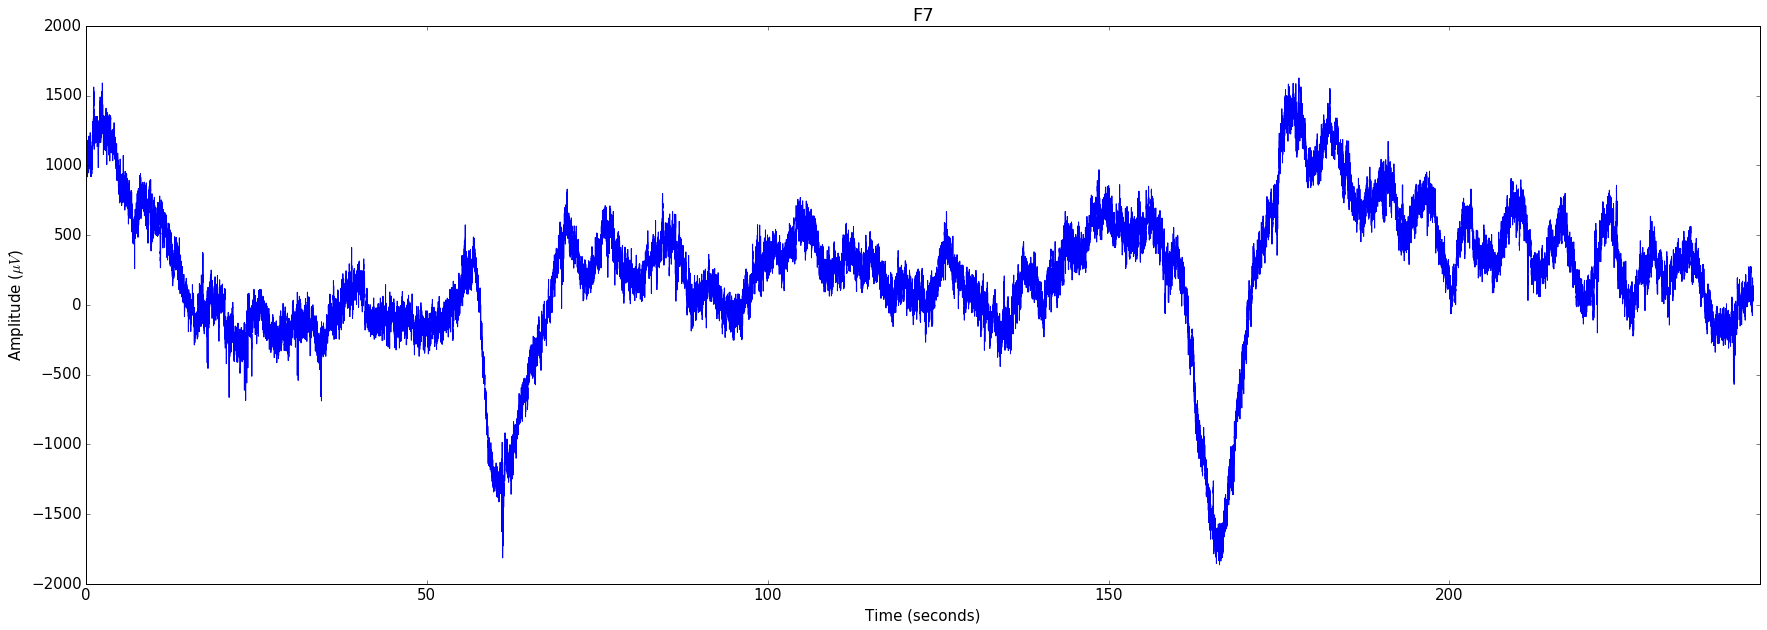

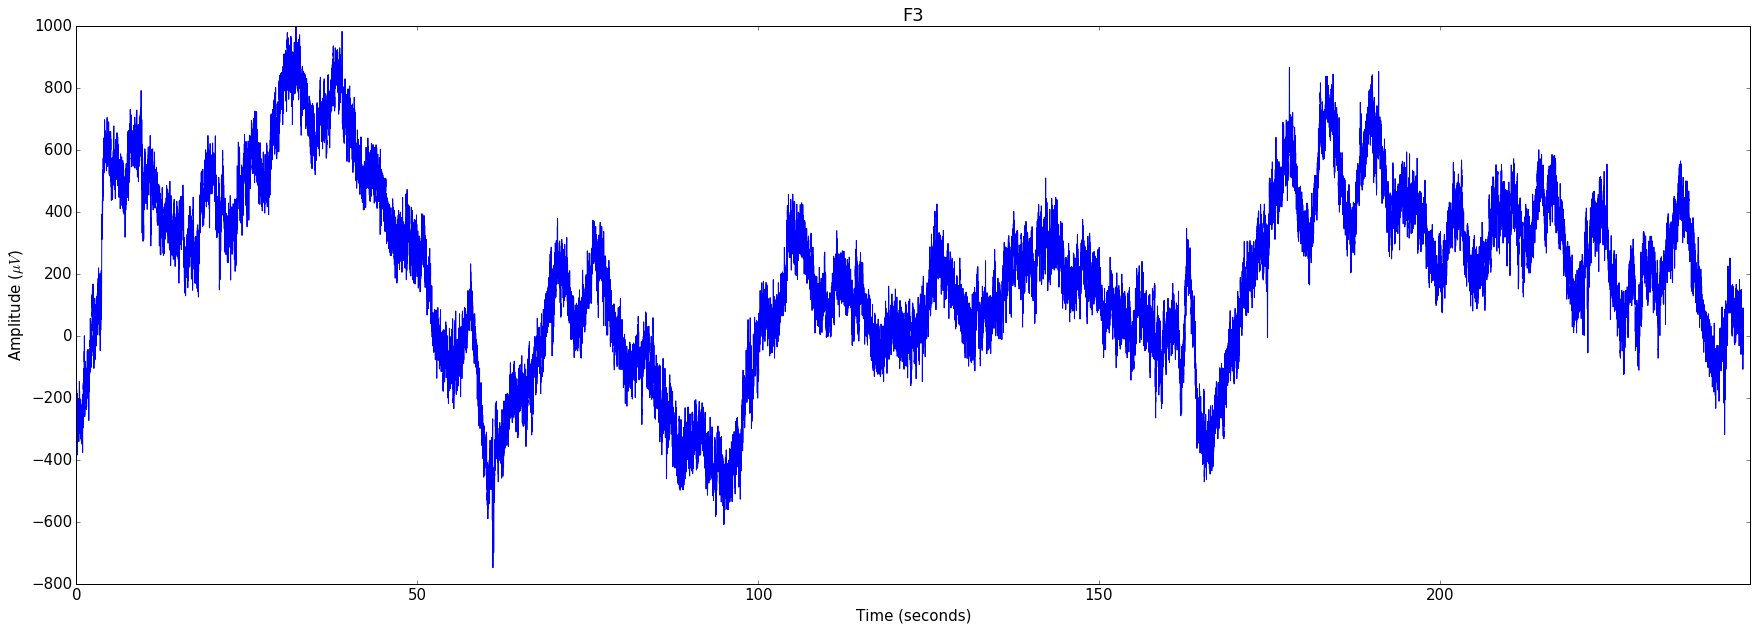

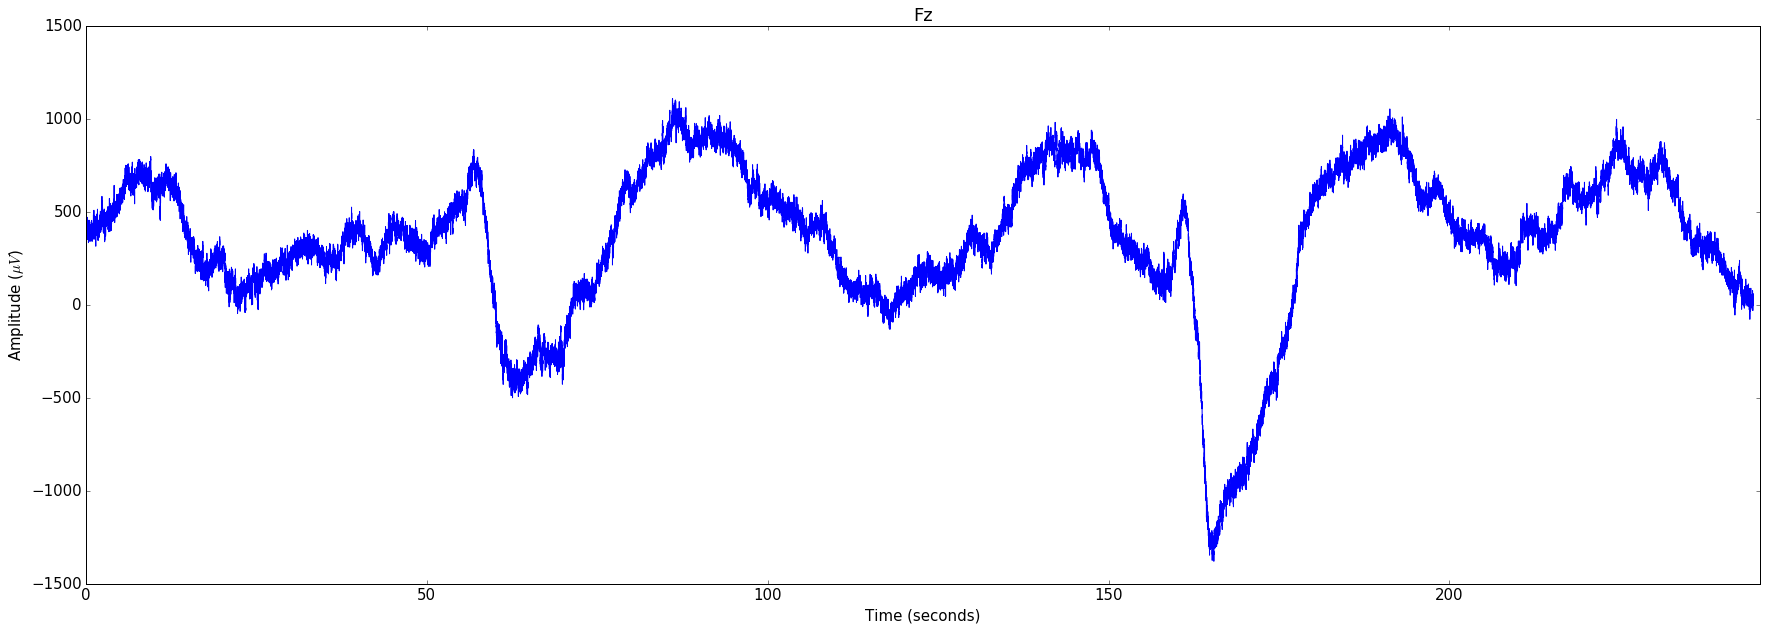

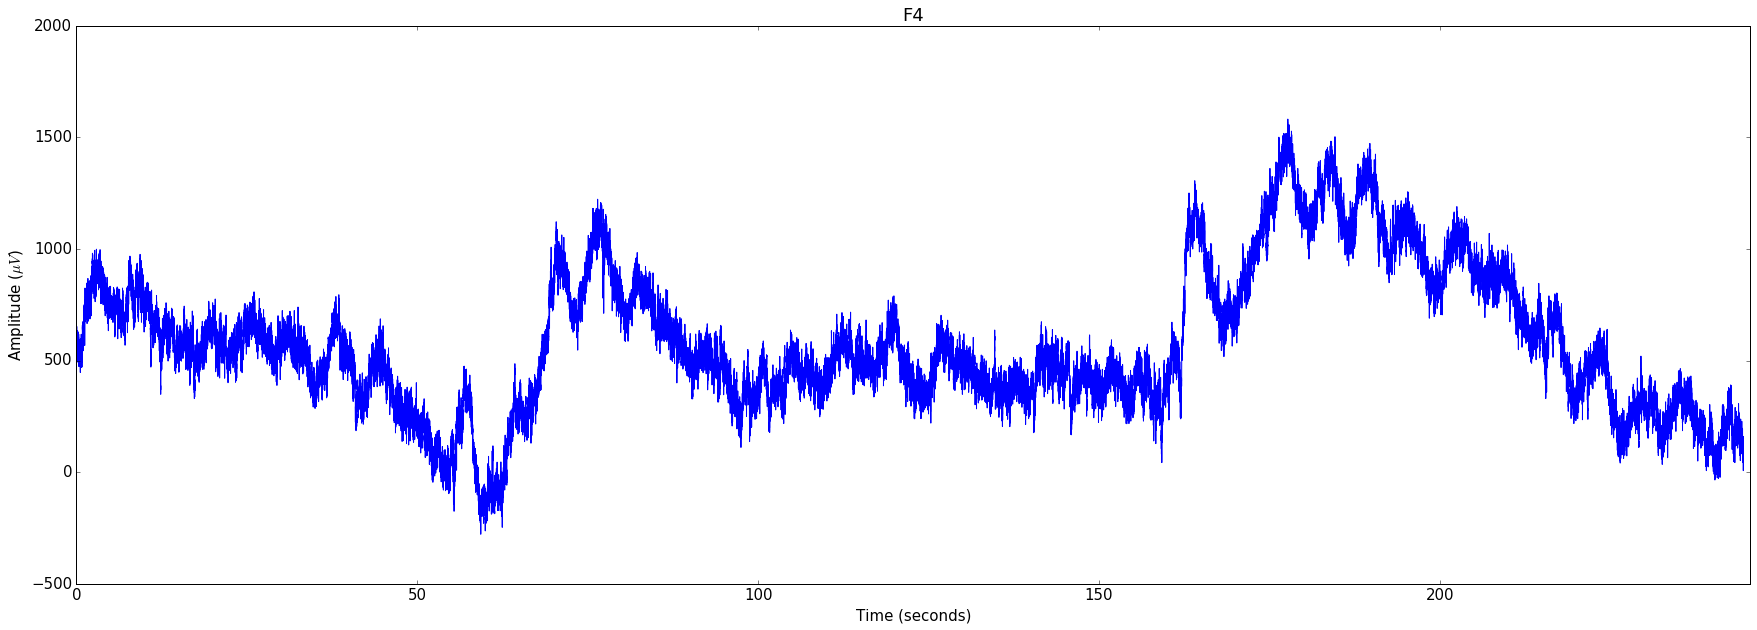

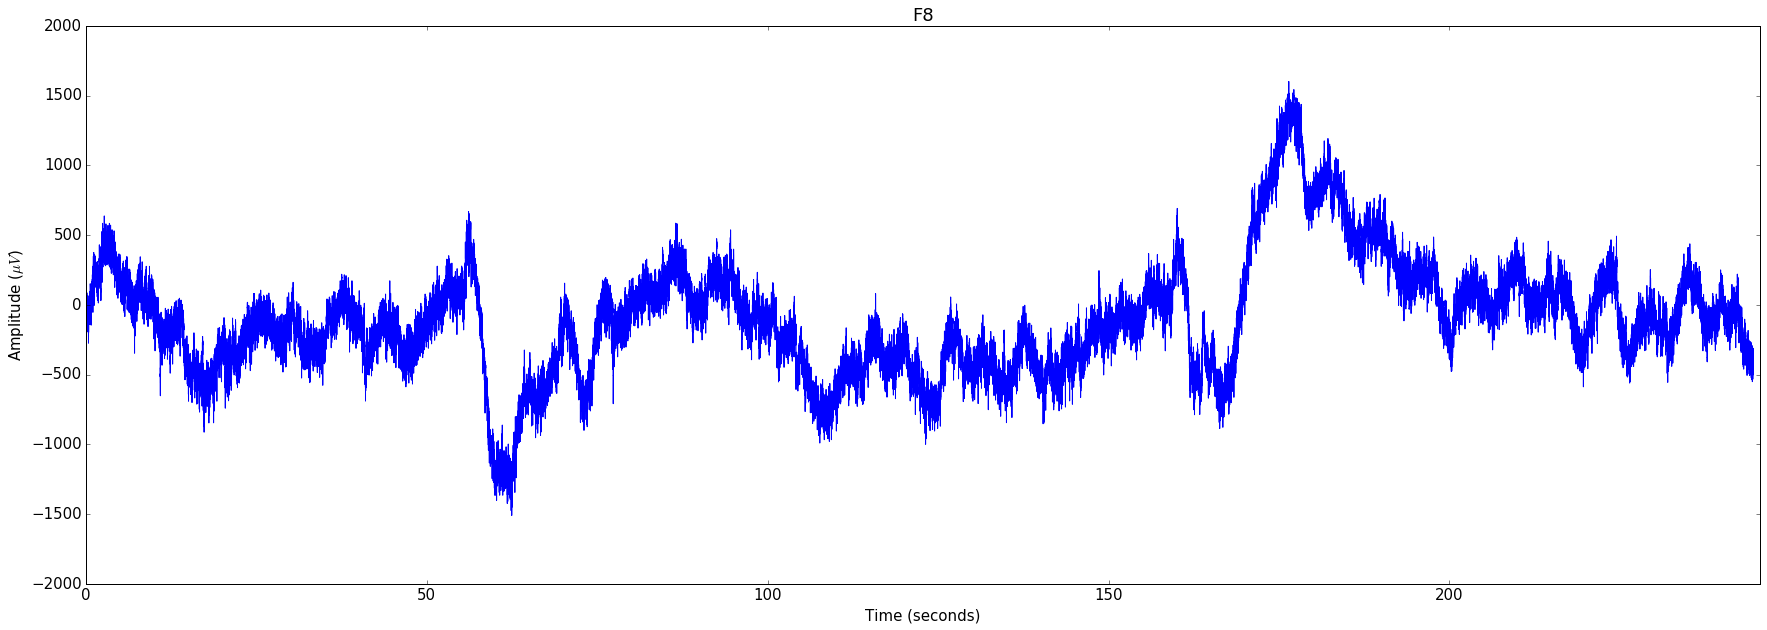

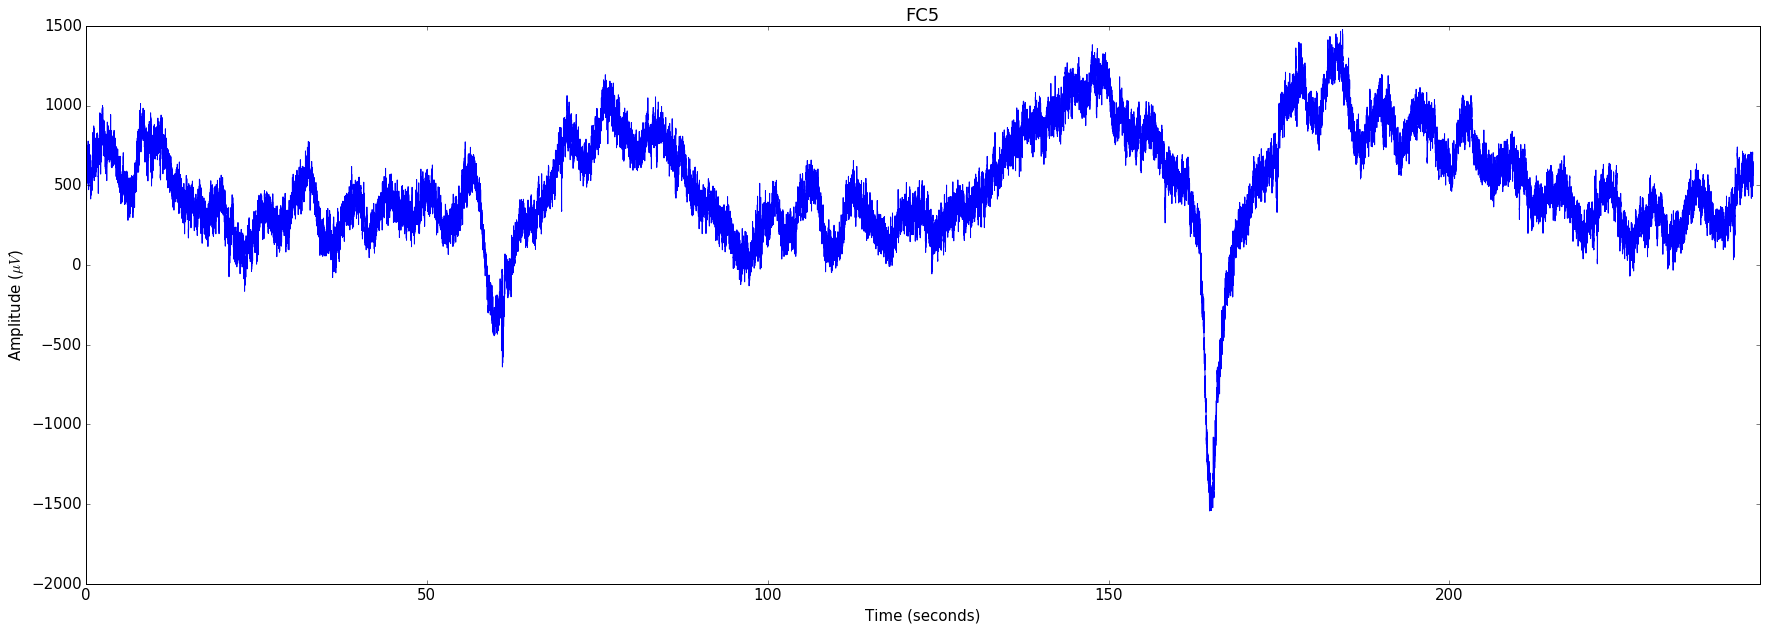

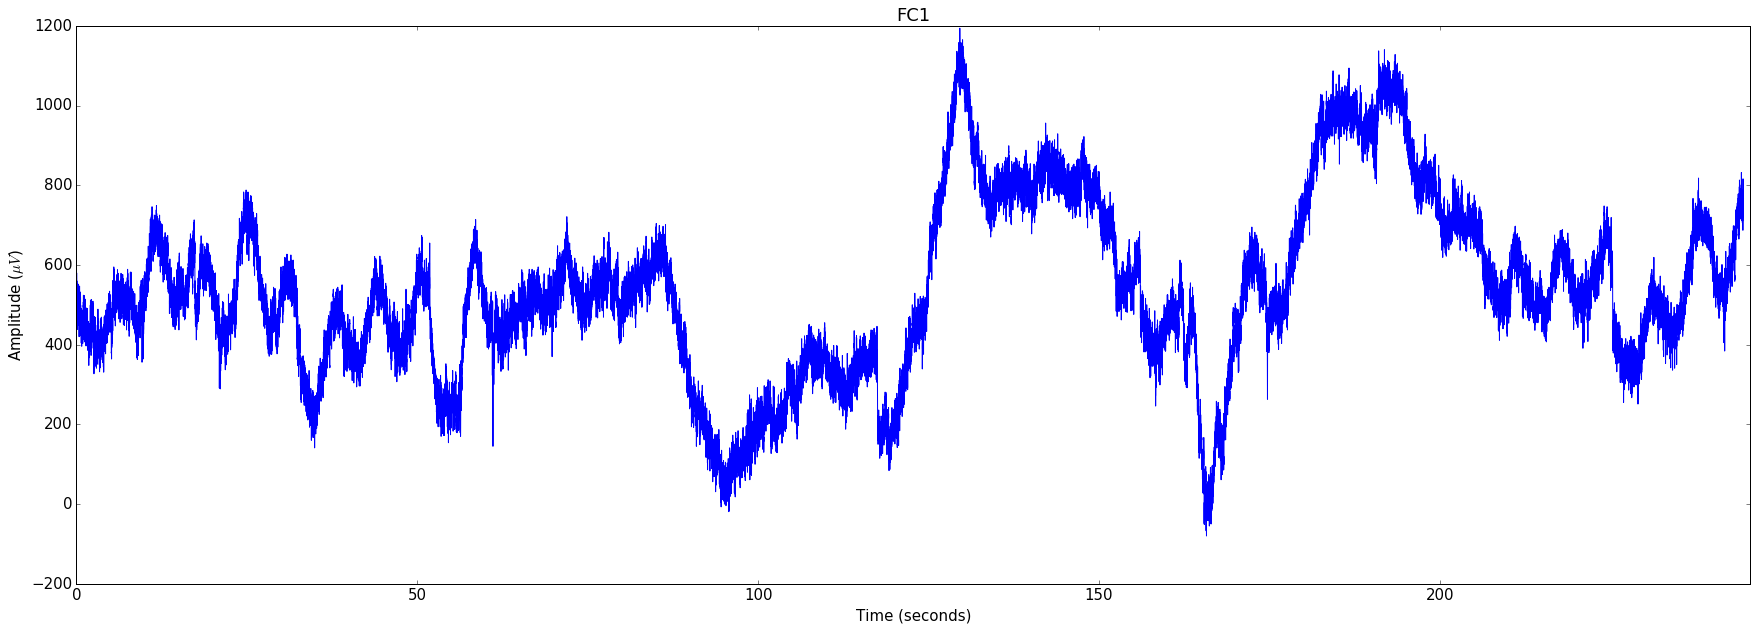

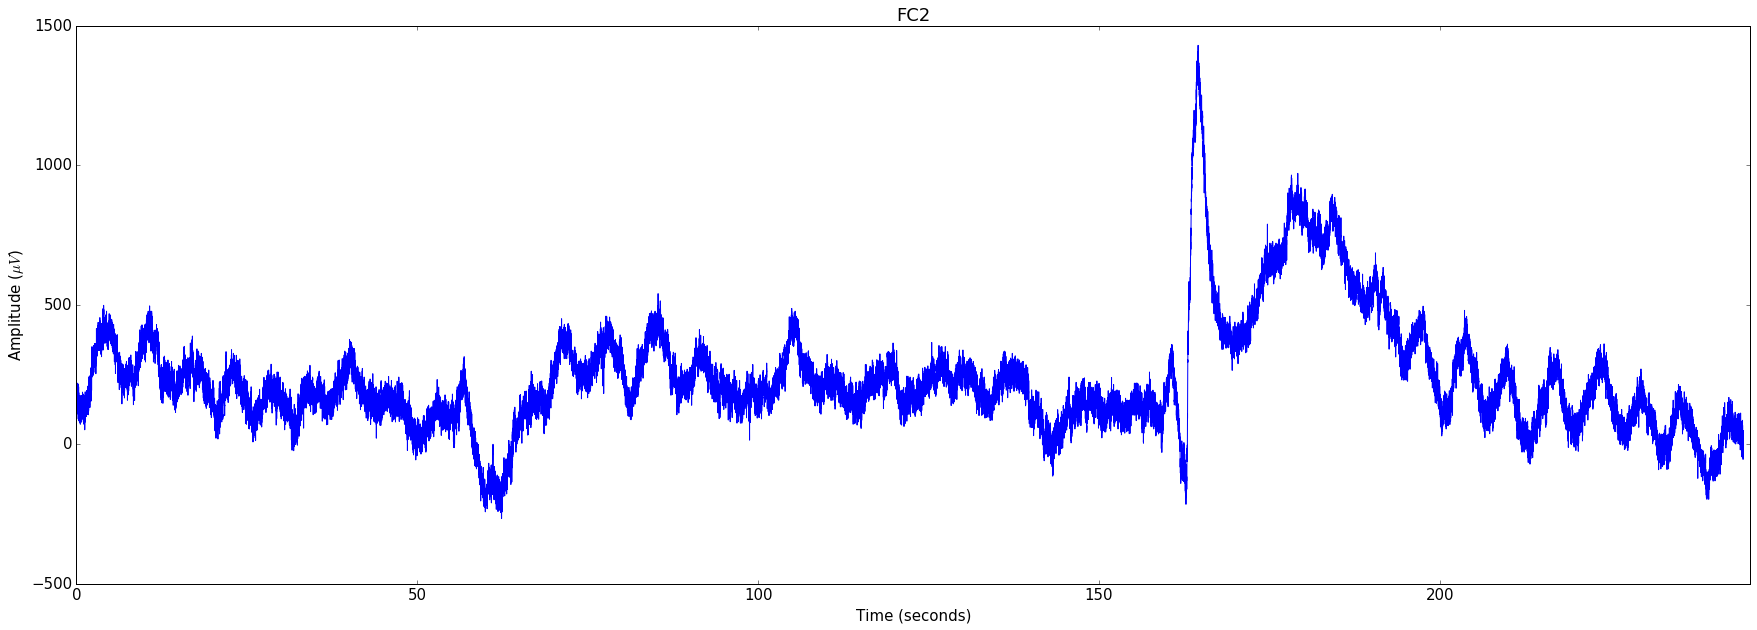

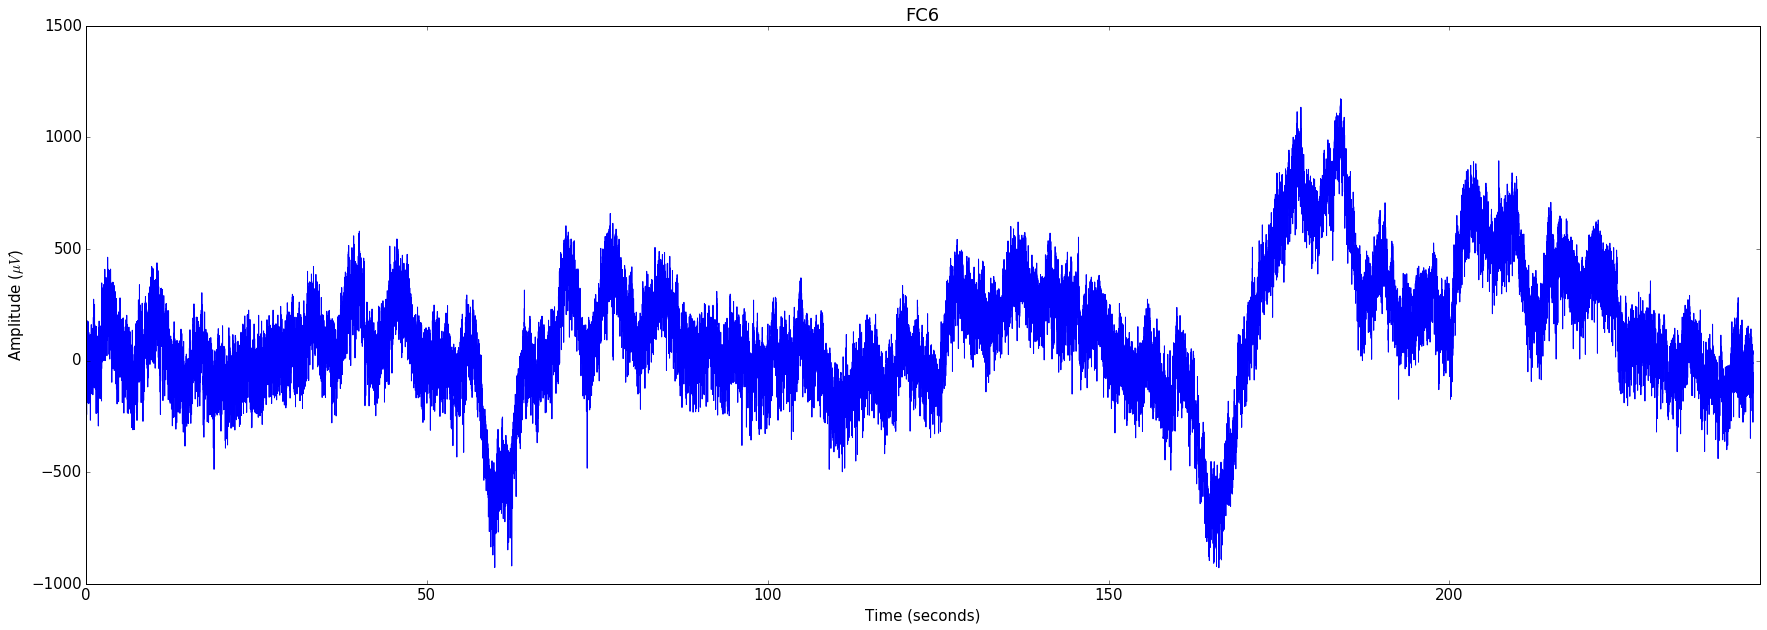

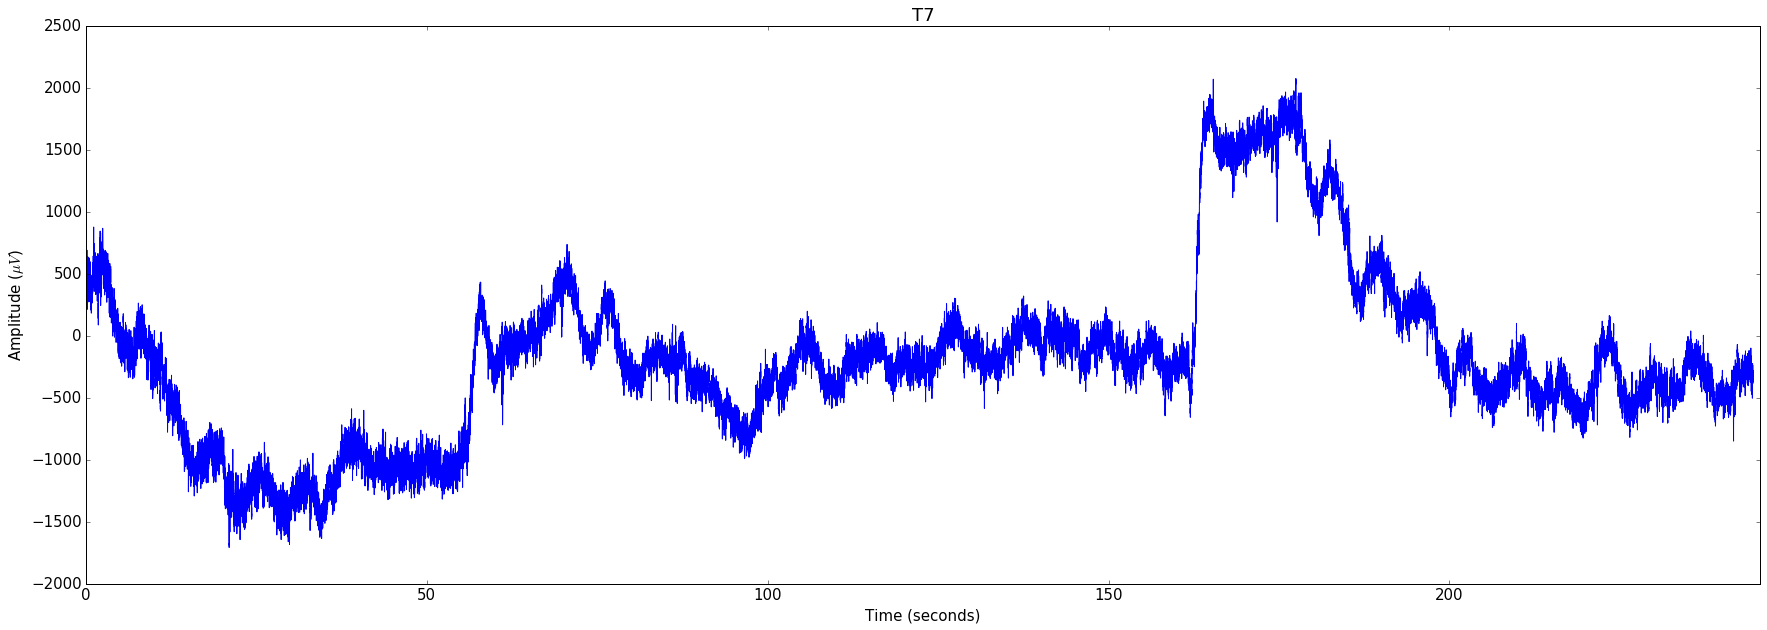

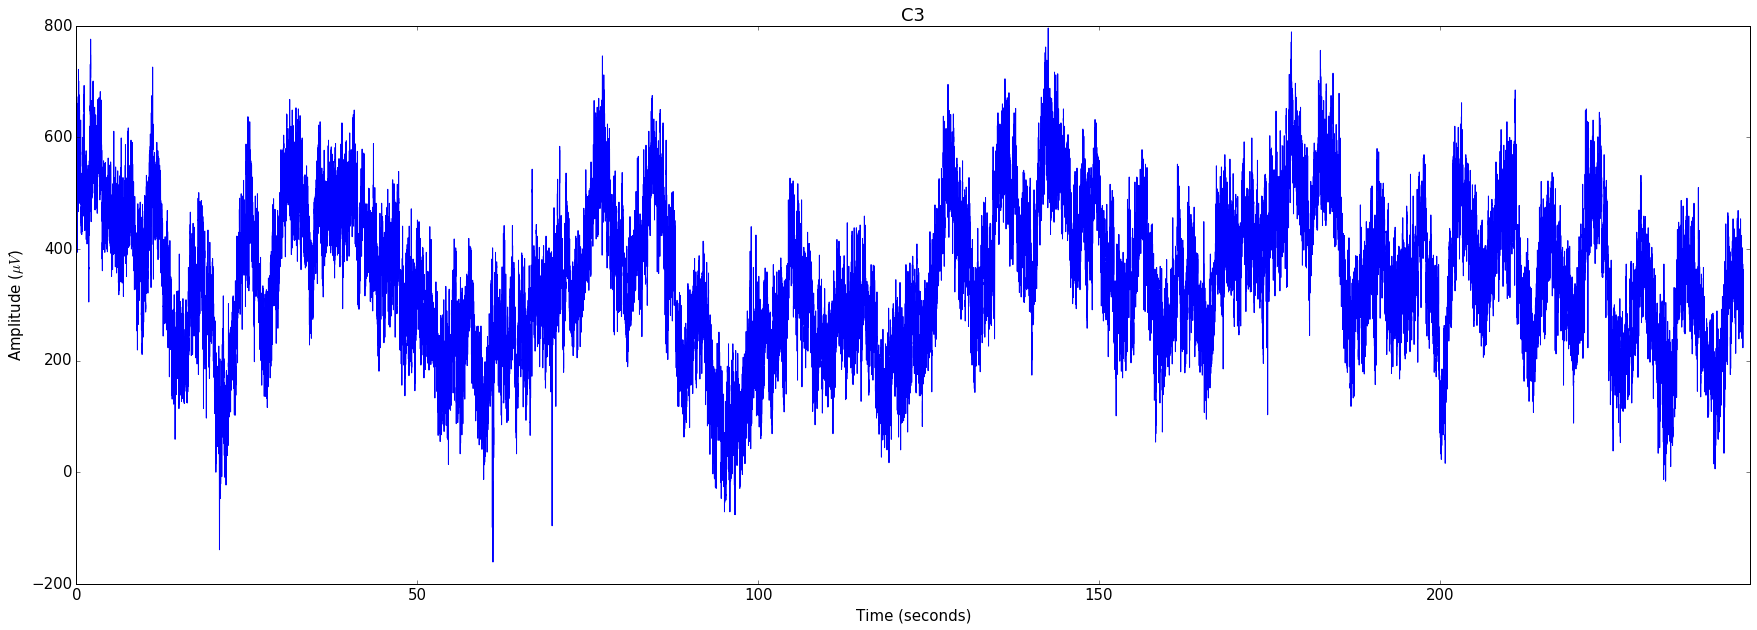

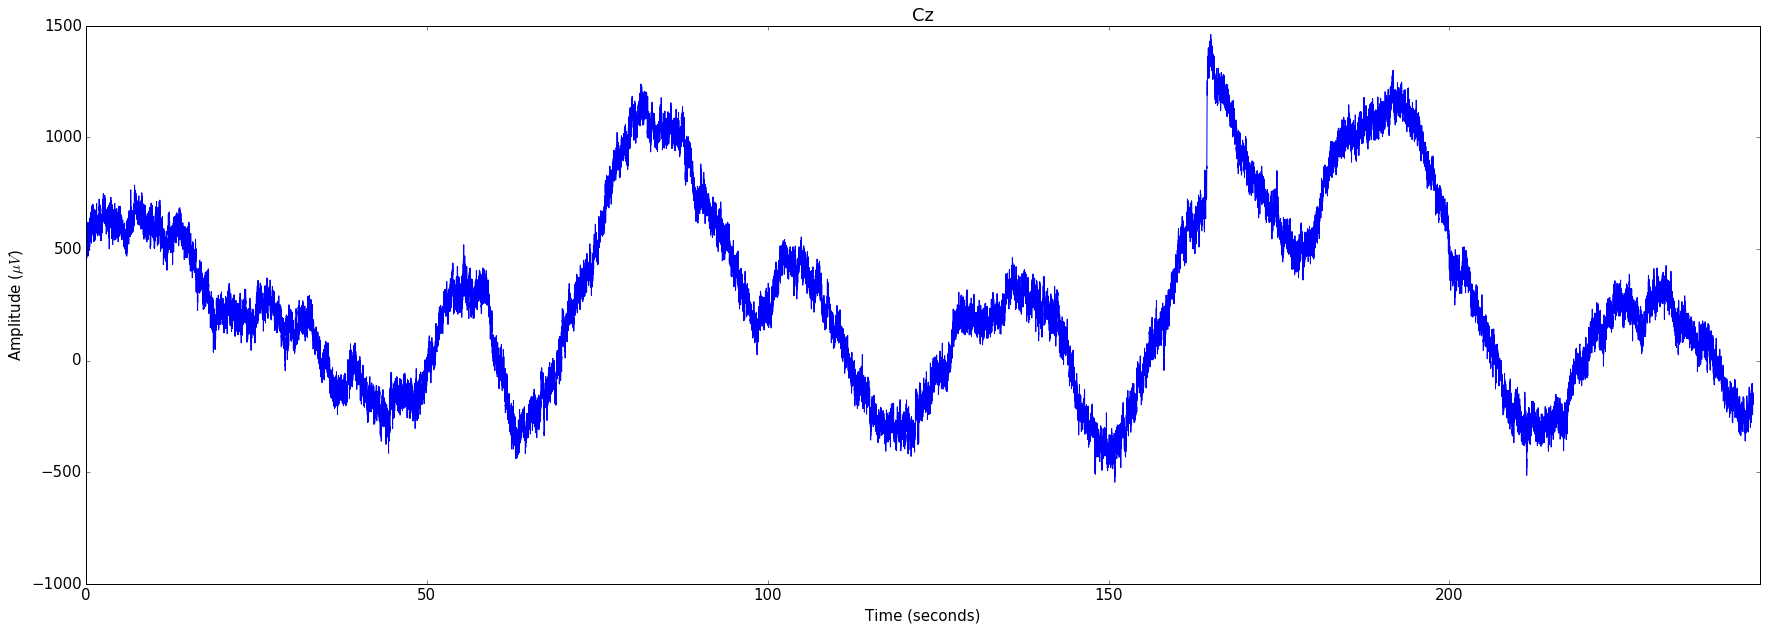

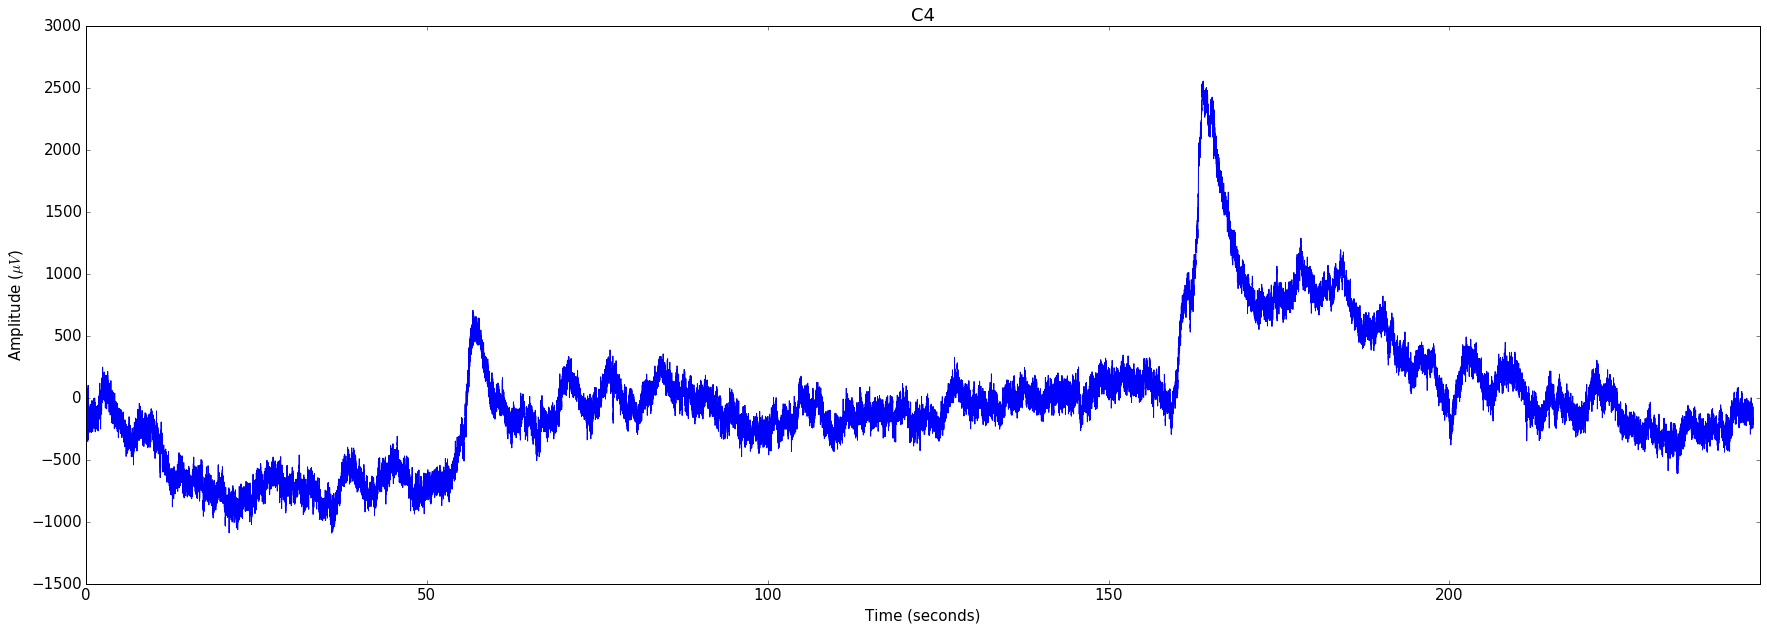

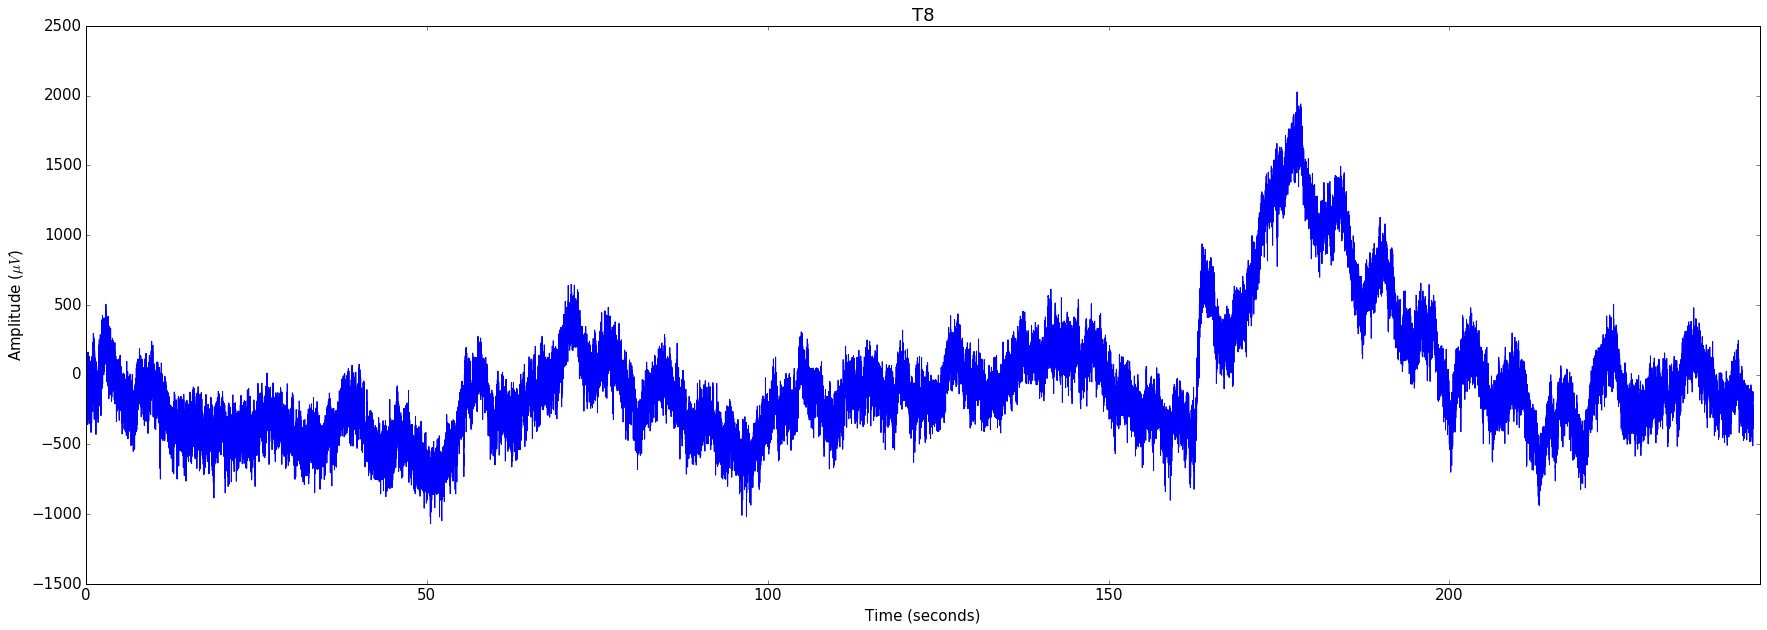

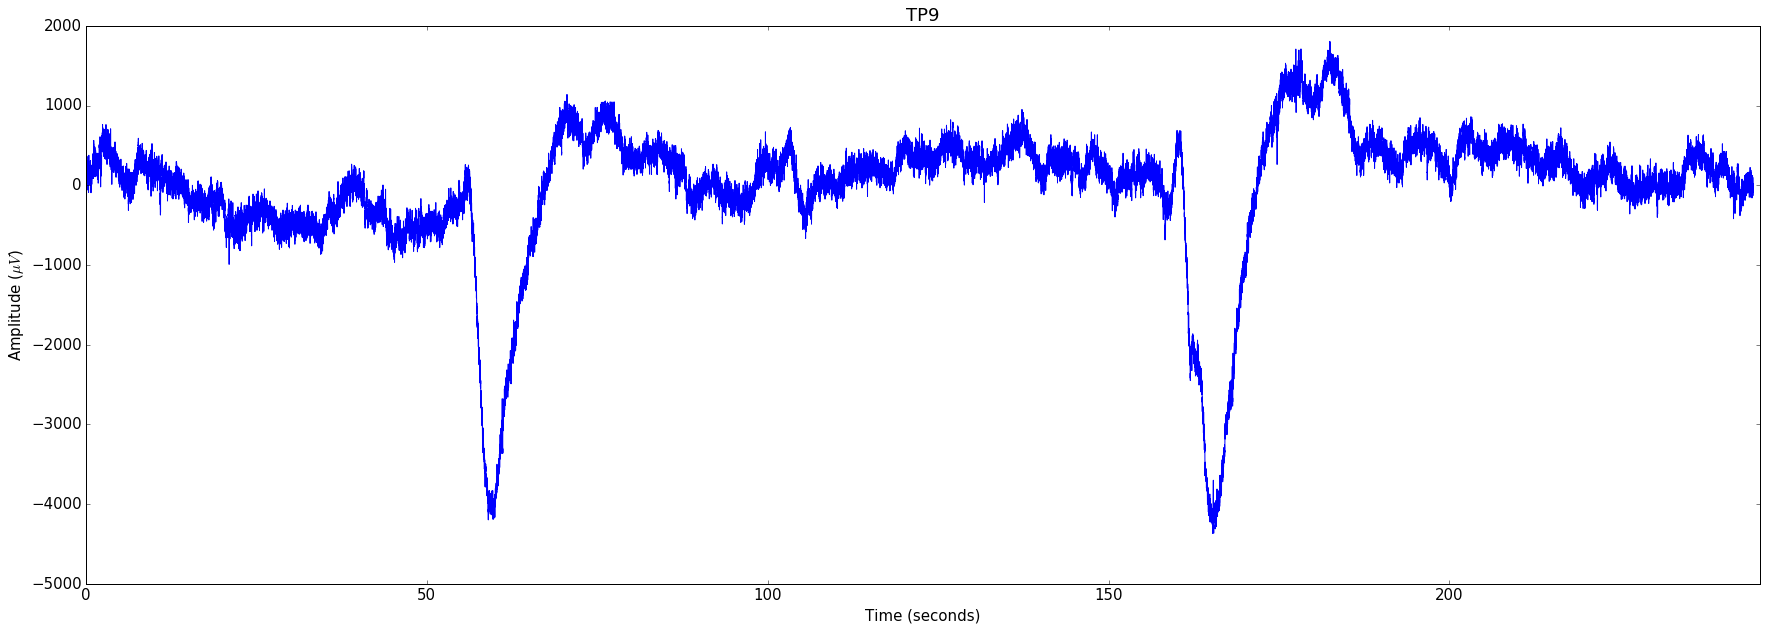

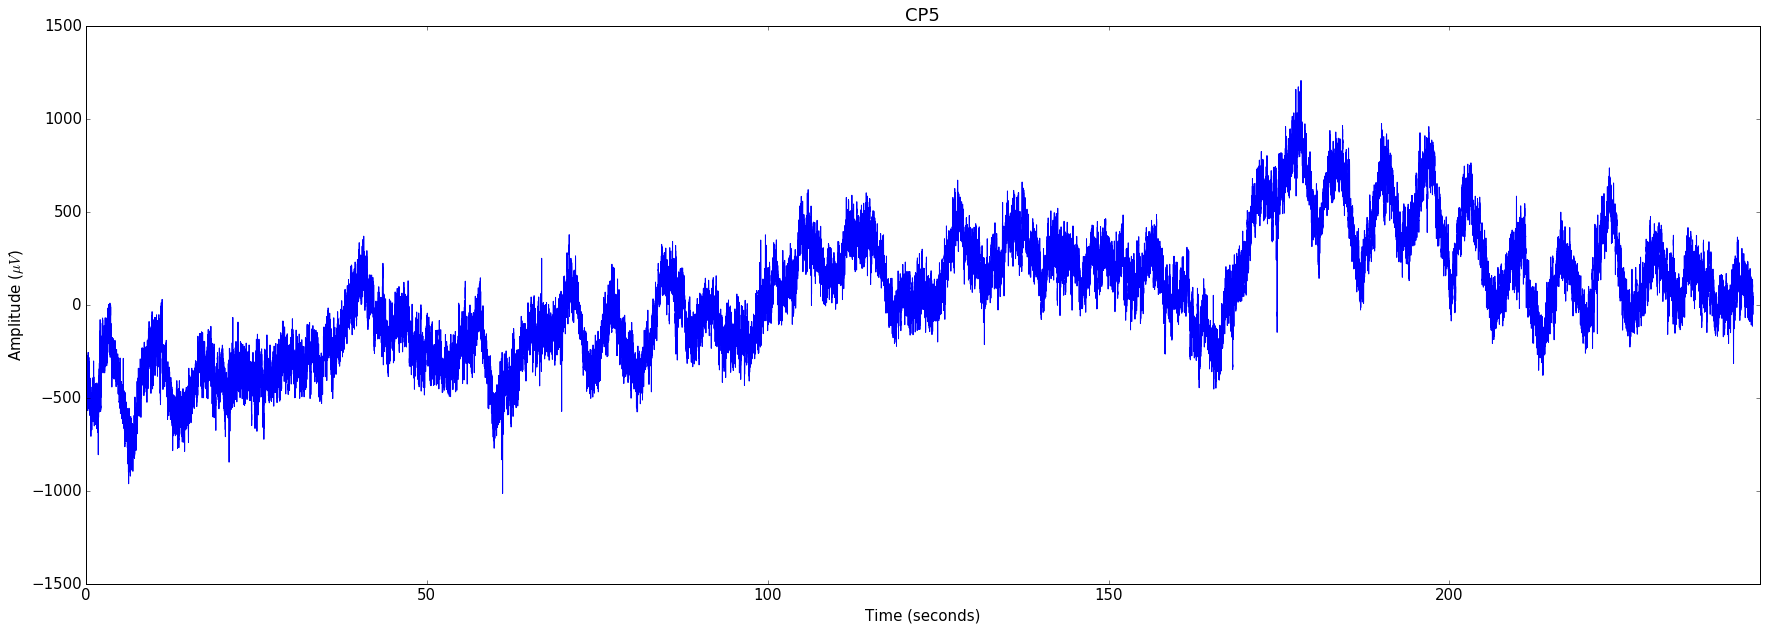

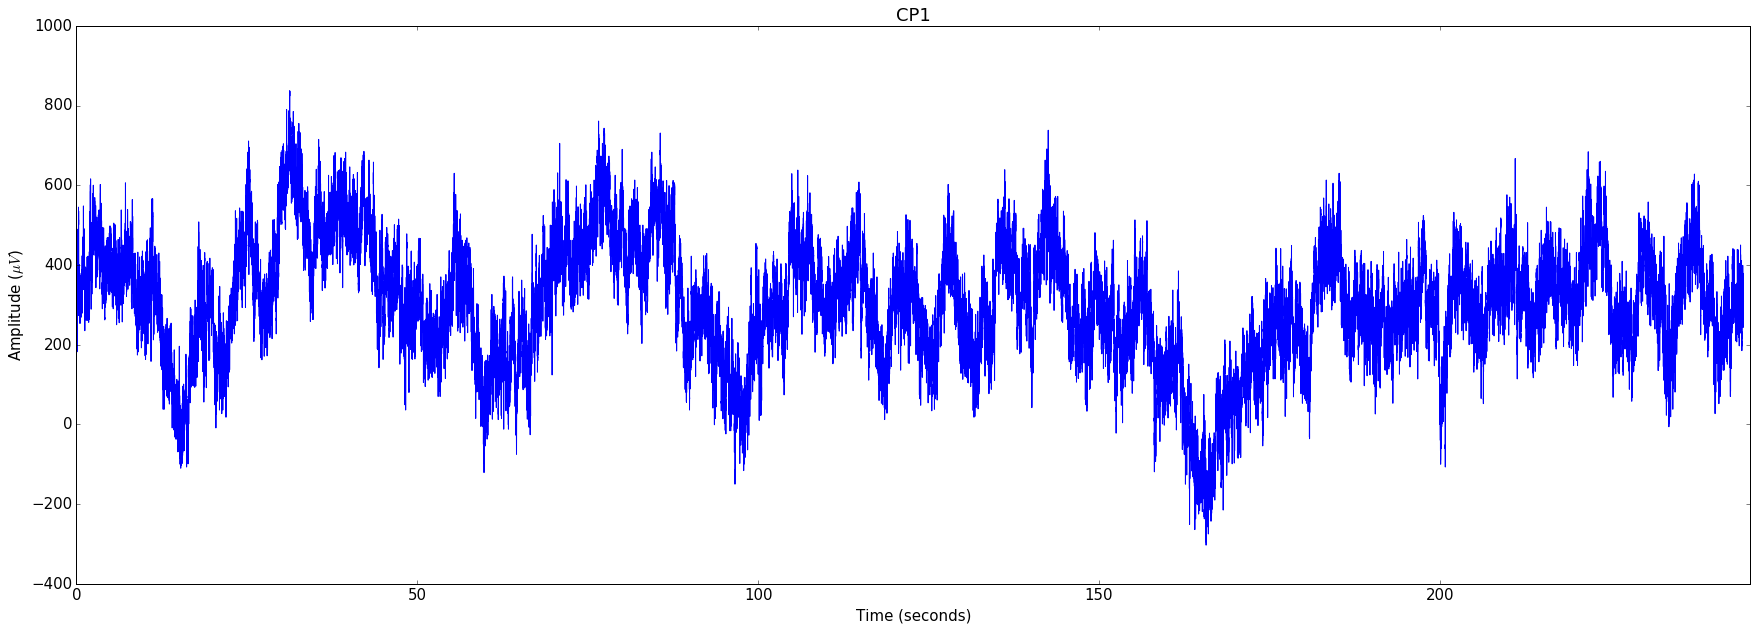

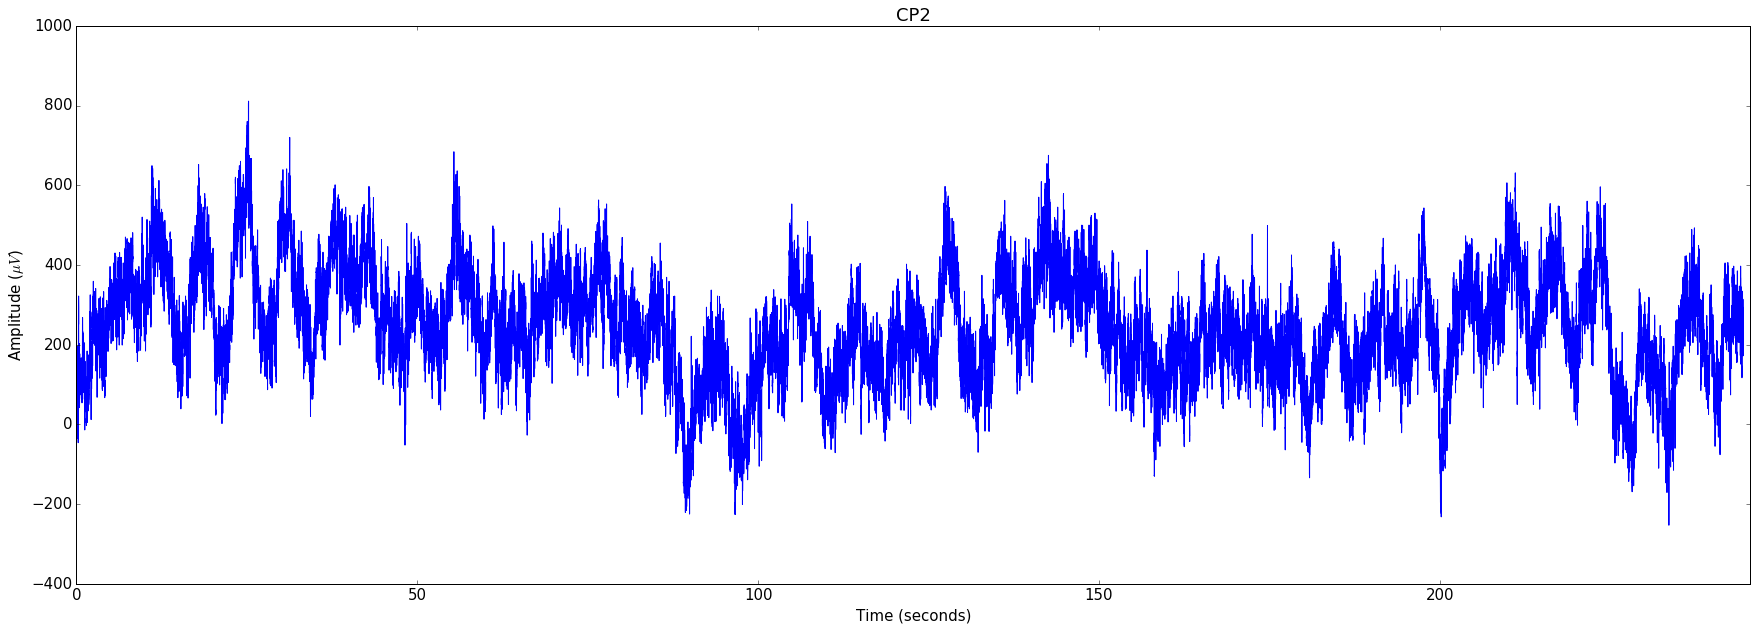

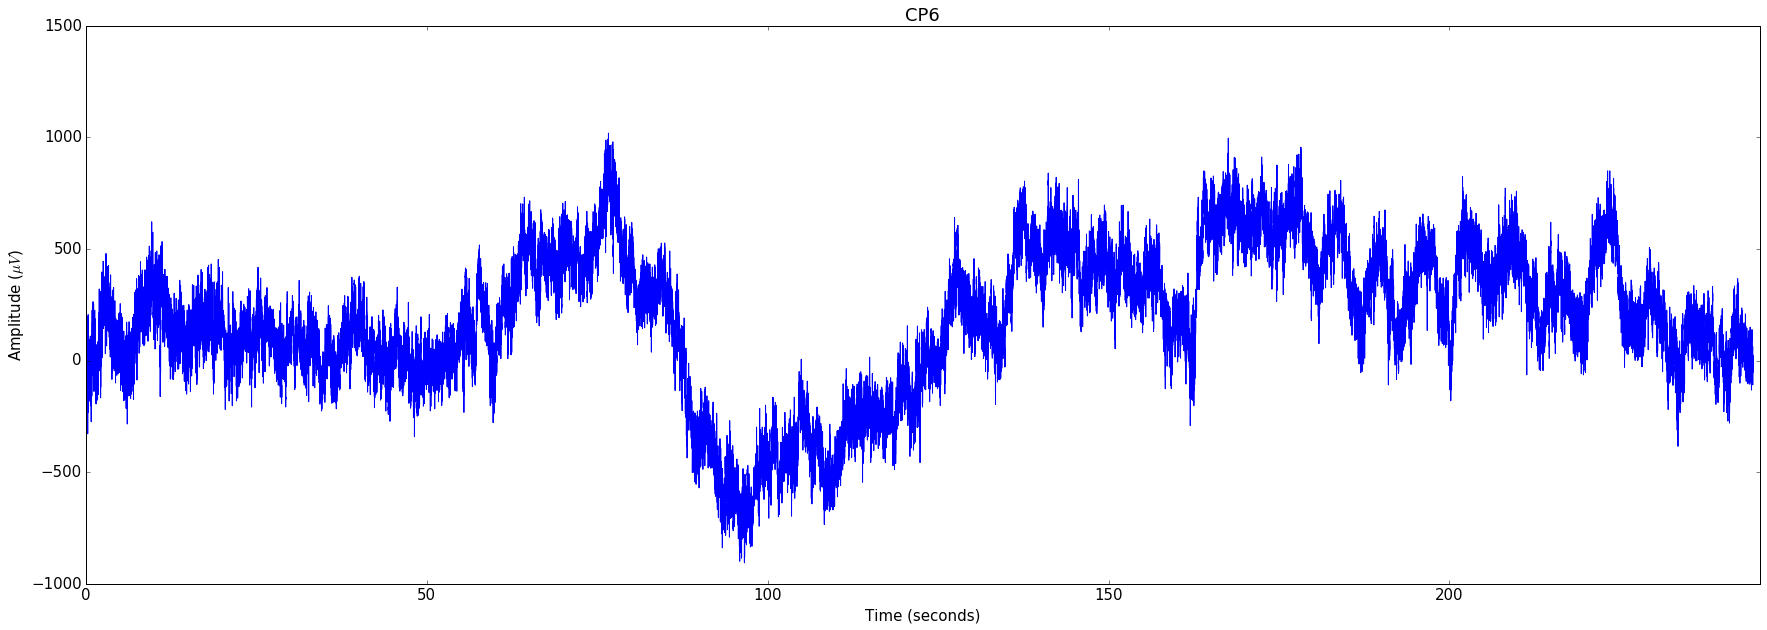

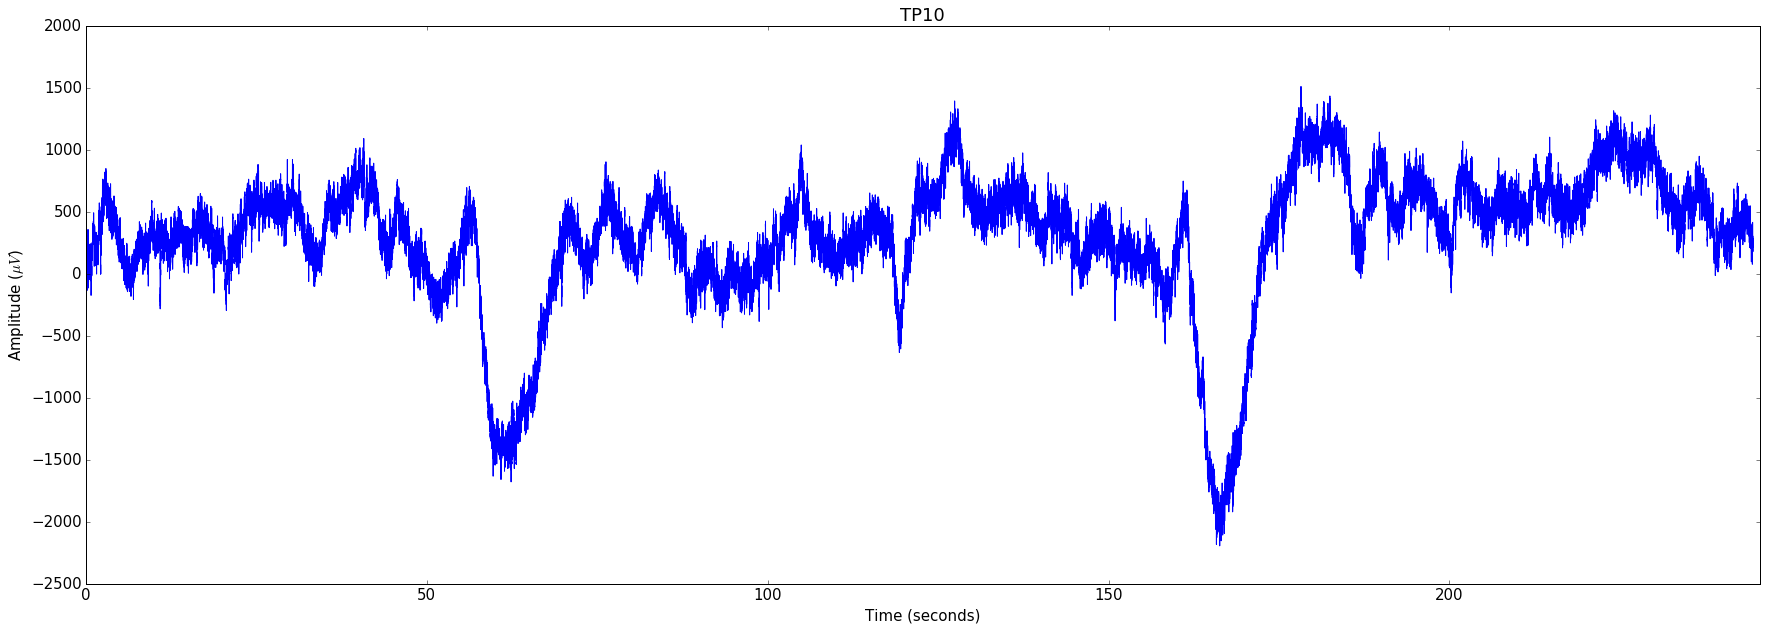

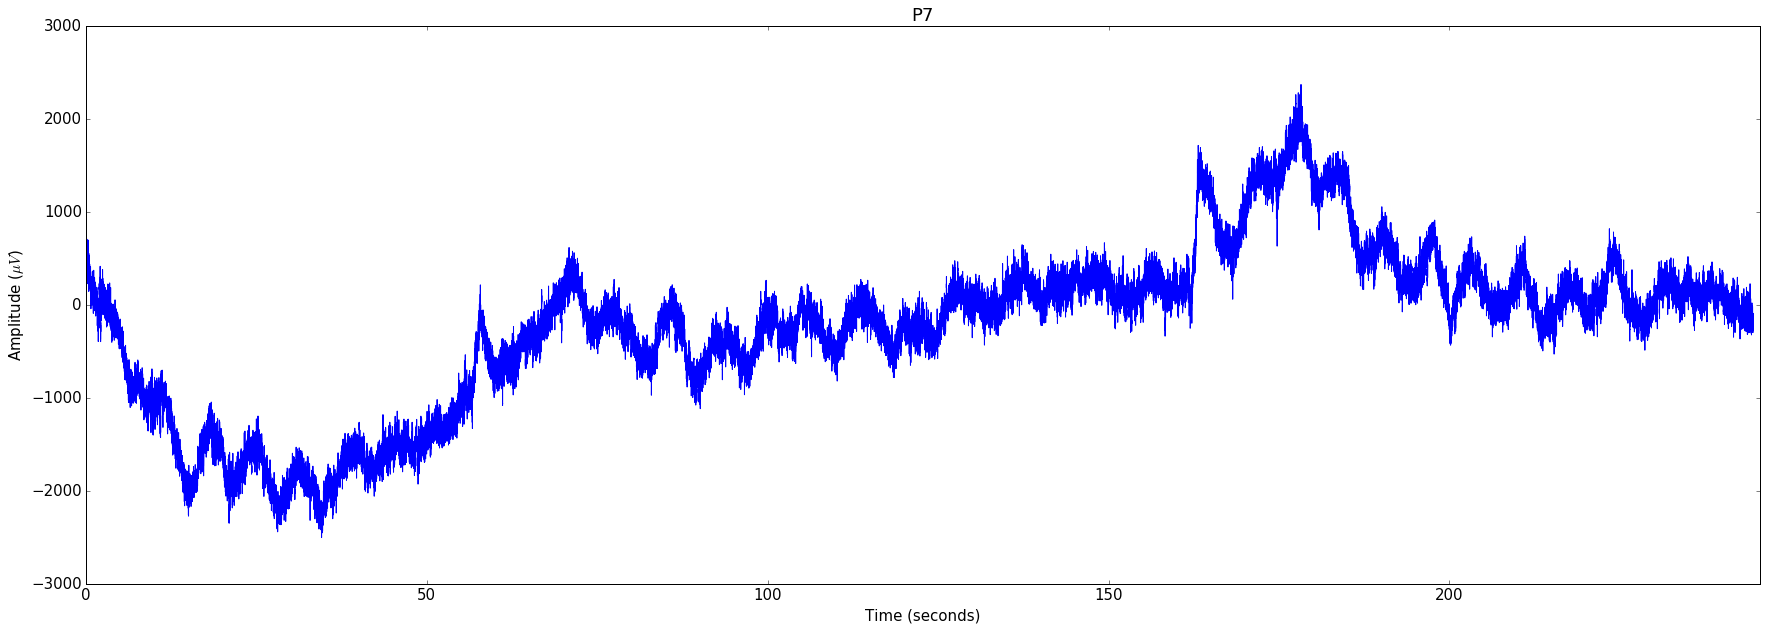

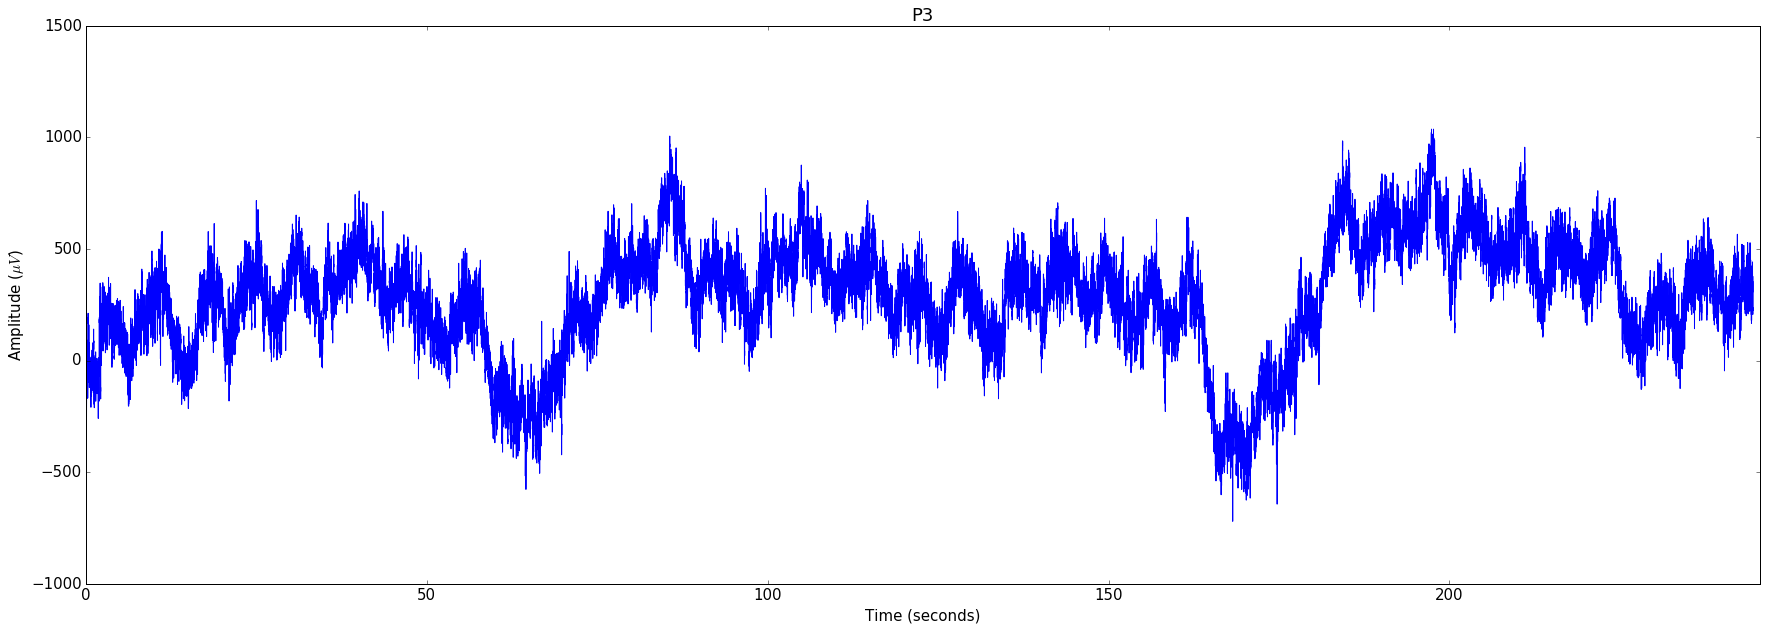

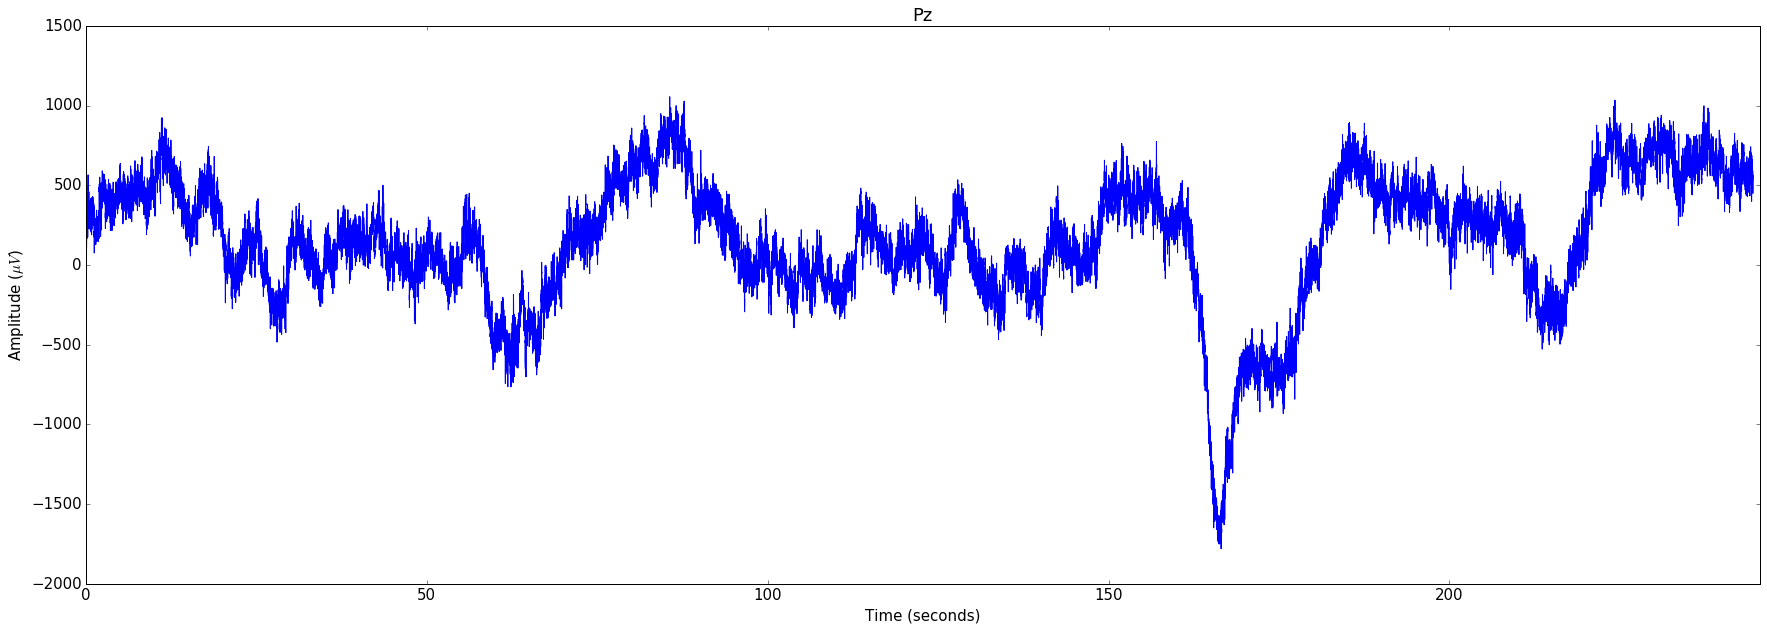

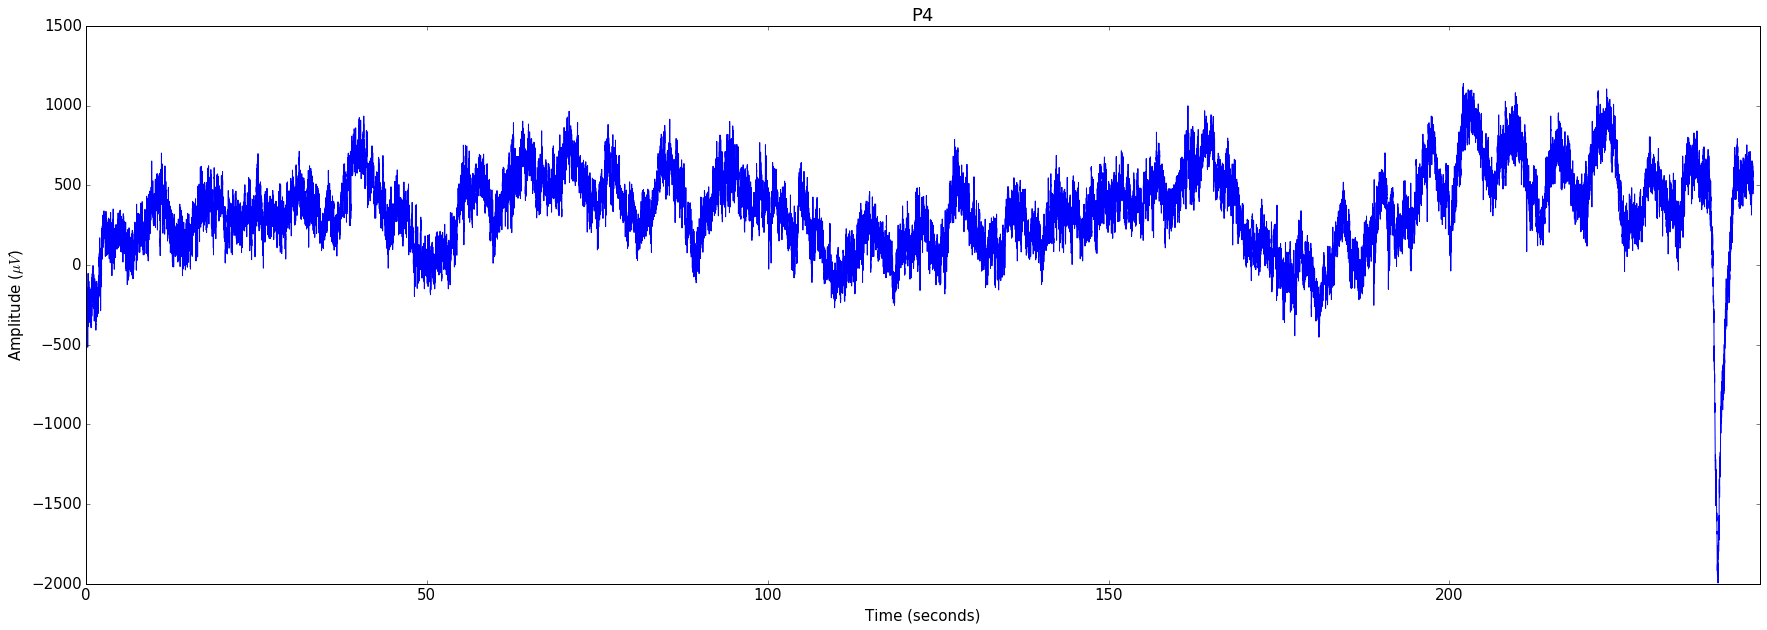

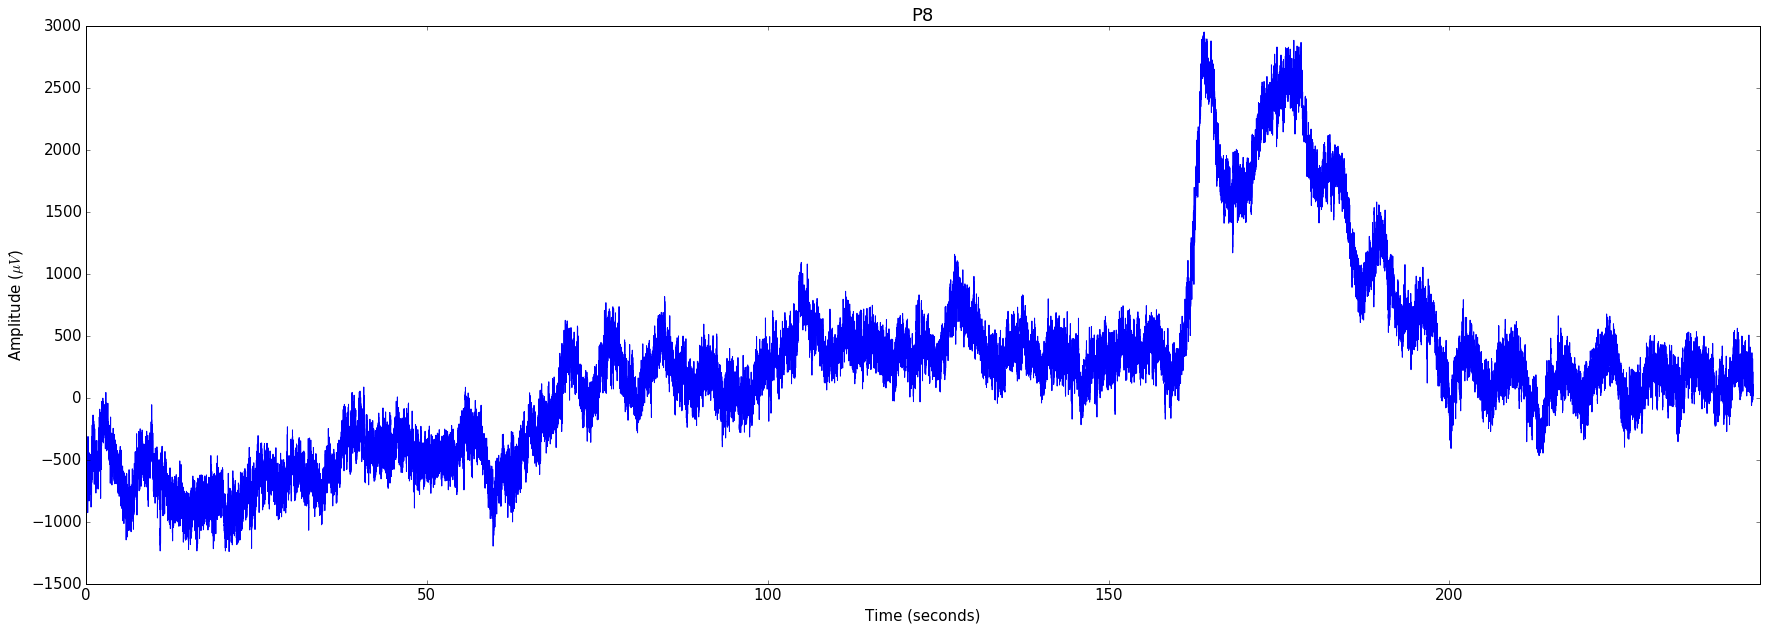

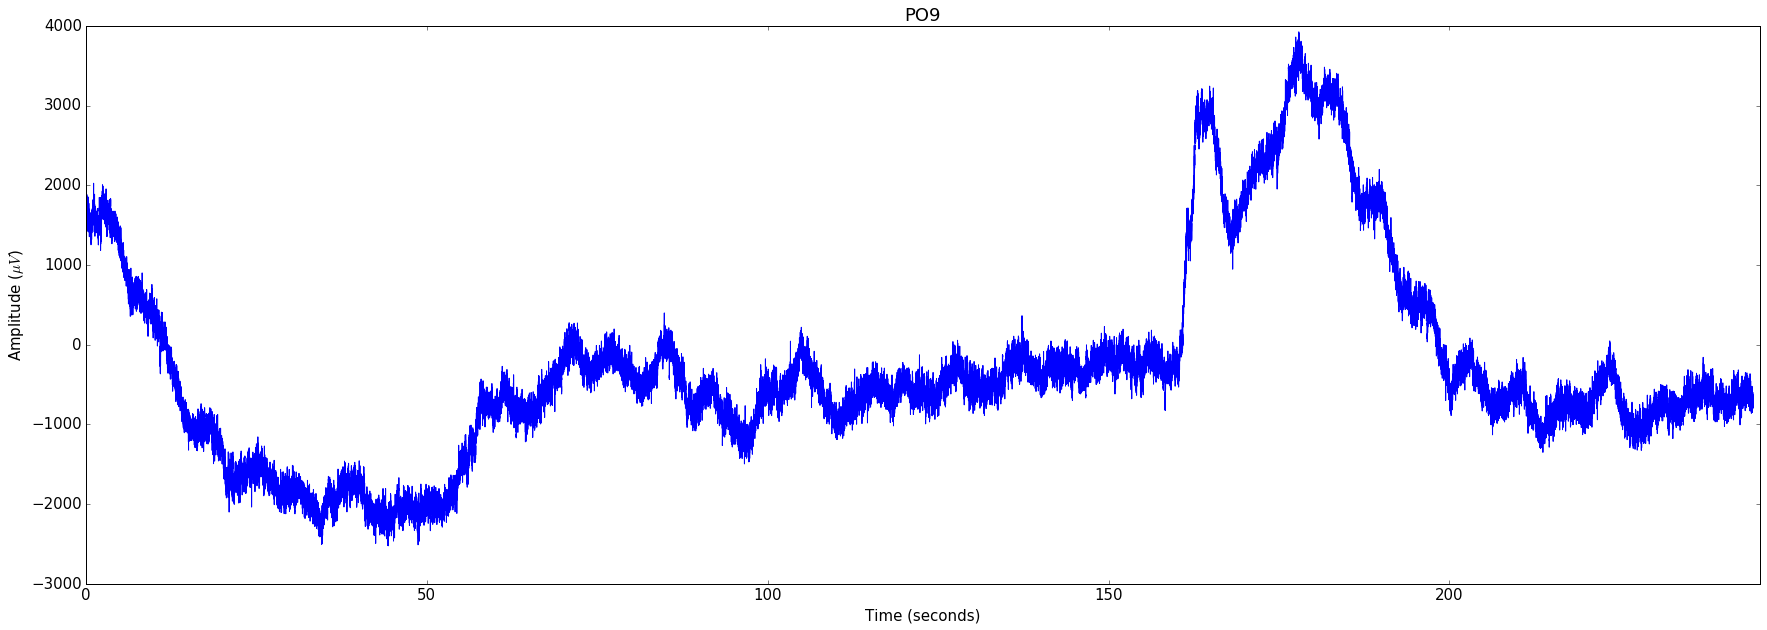

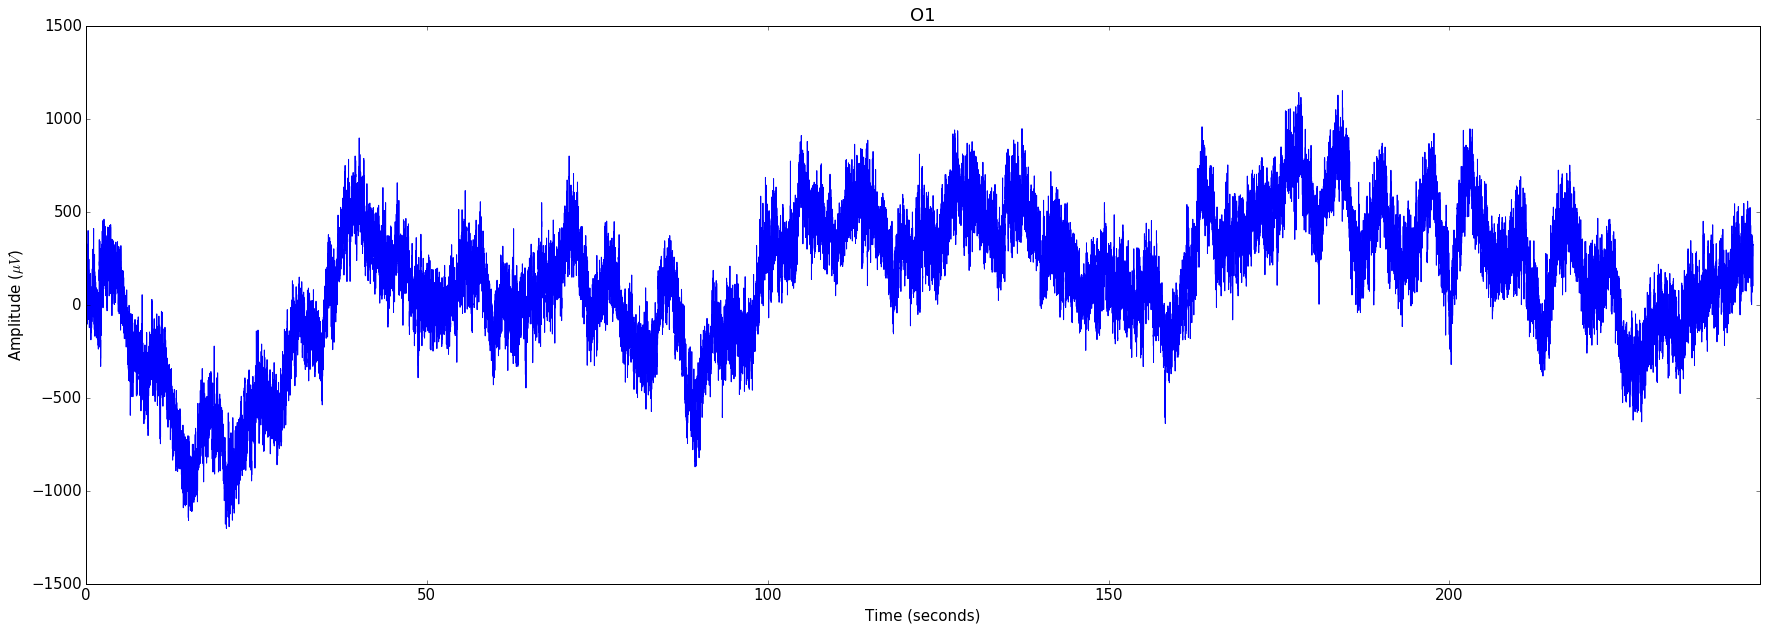

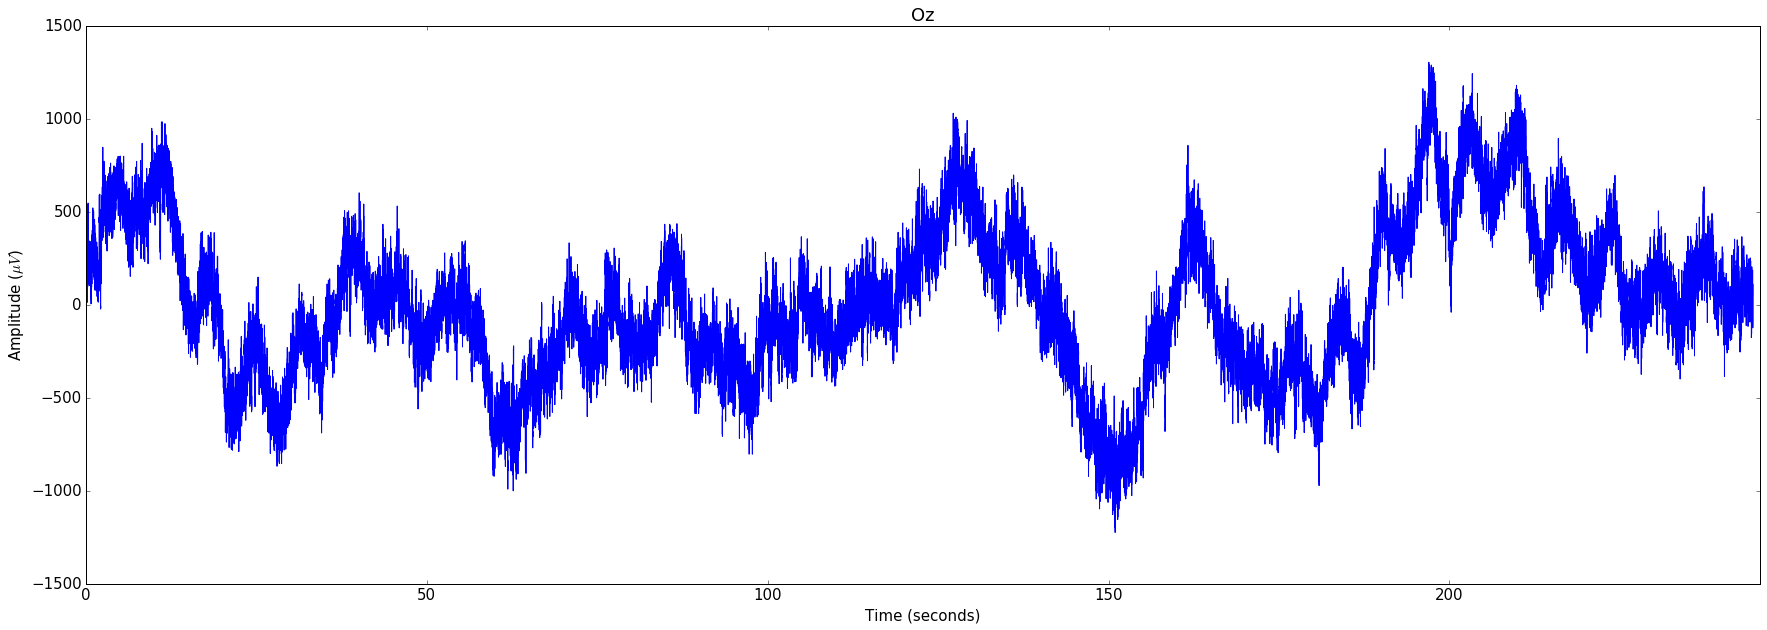

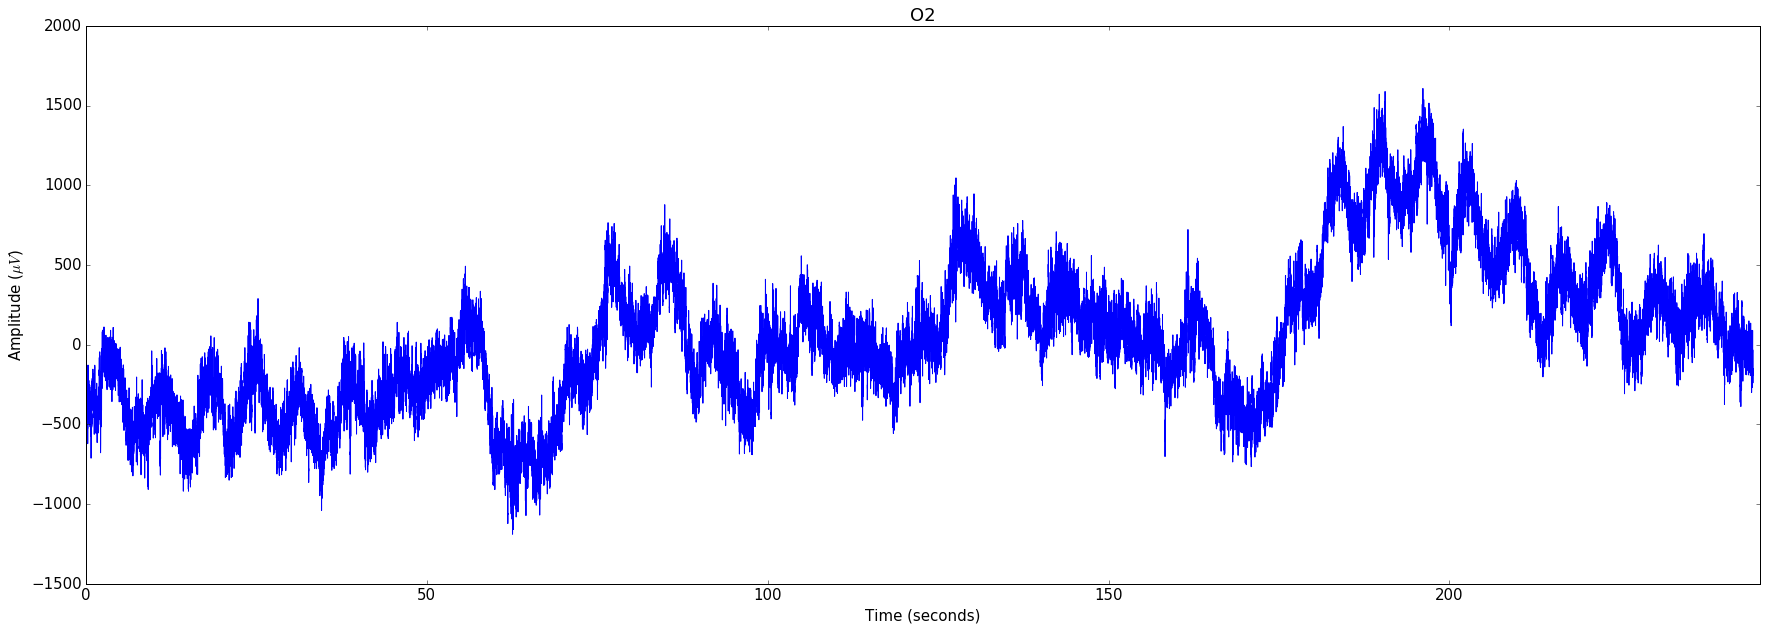

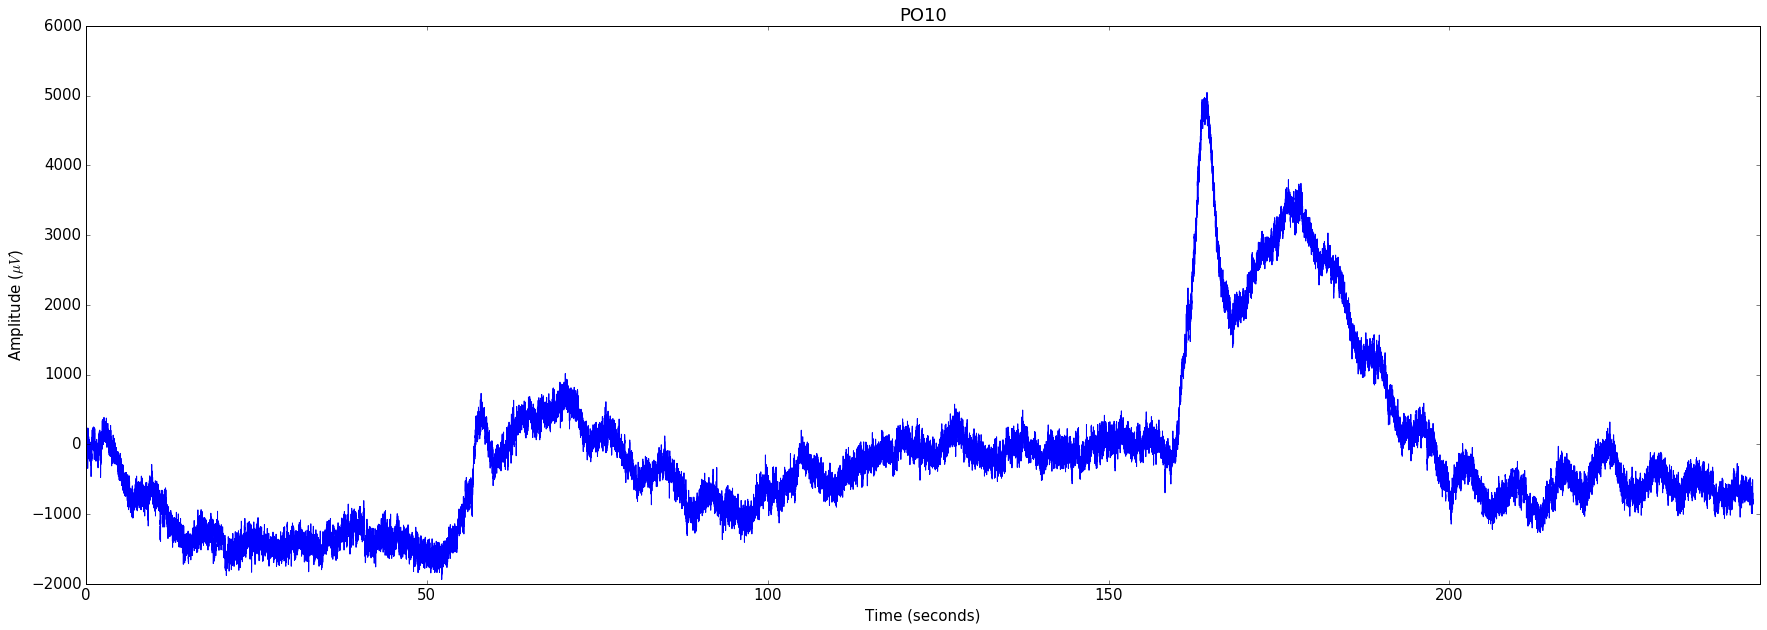

In [23]:
#let's look at the time series of all the plots
for col in series.columns:
    fig = plt.gcf()
    fig.set_size_inches((30, 10))
    #plt.plot(x_axis[:10000], series[col].values[:10000])
    plt.plot(x_axis, series[col].values)
    plt.xlabel('Time (seconds)')
    plt.ylabel(r'Amplitude ($\mu V$)')
    plt.xlim(0, x_axis[-1] + 1)
    #plt.xlim(0)
    plt.title(col)
    plt.show()
    plt.close()


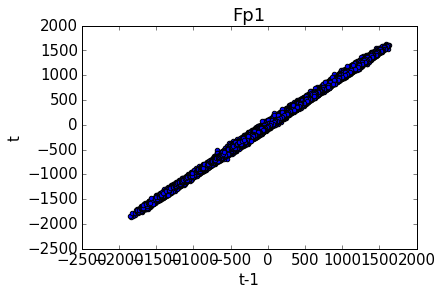

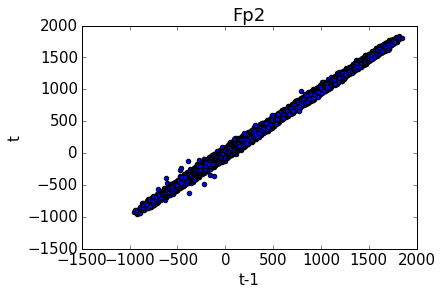

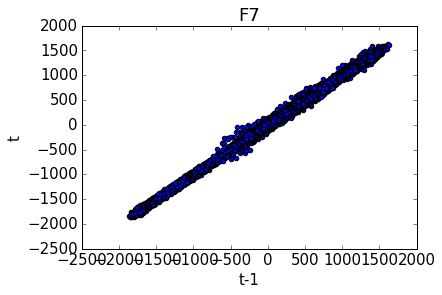

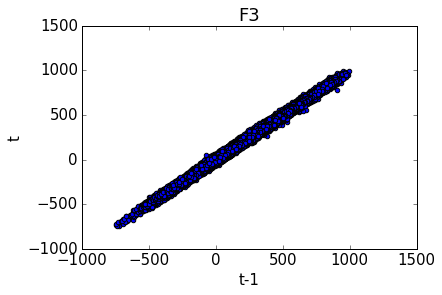

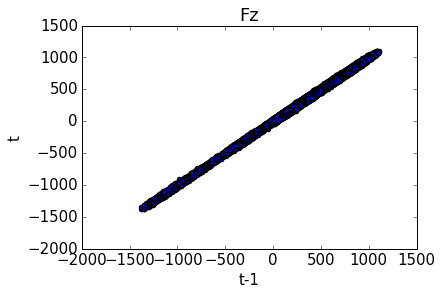

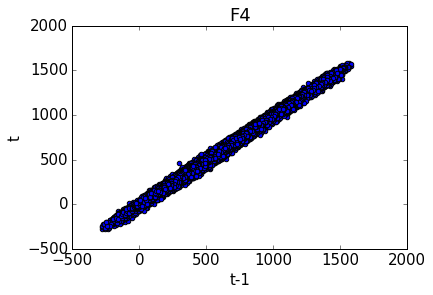

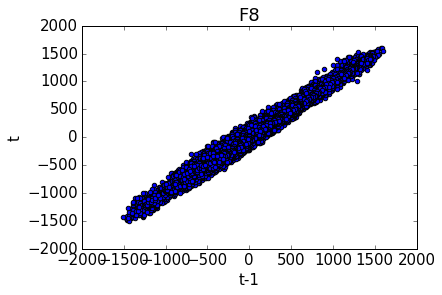

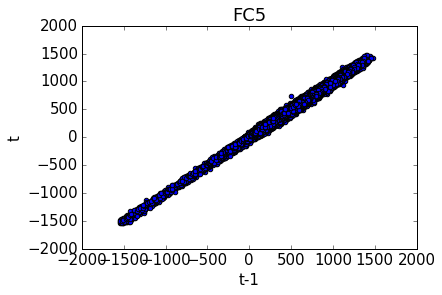

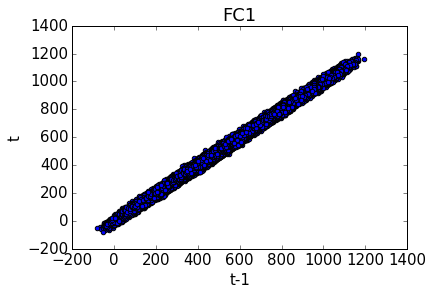

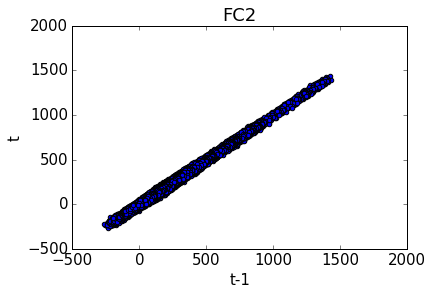

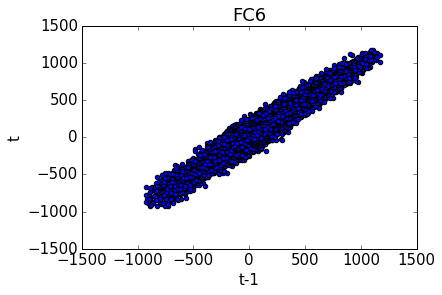

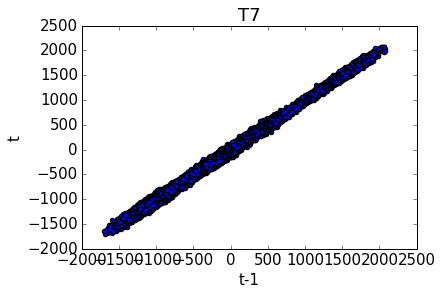

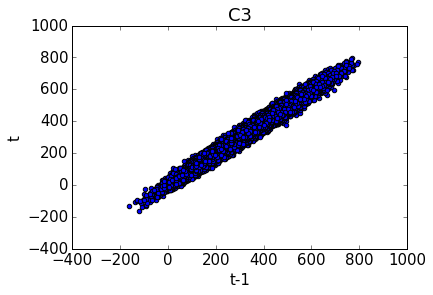

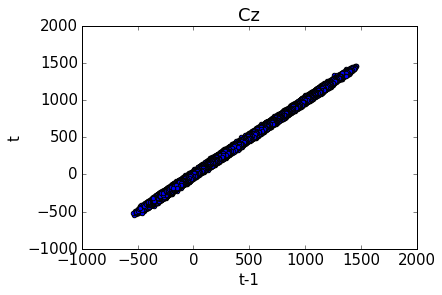

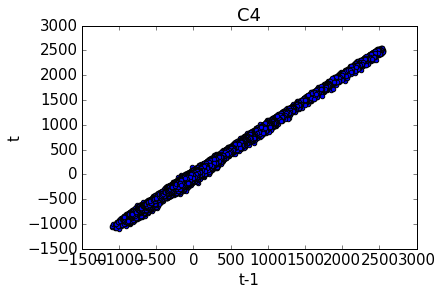

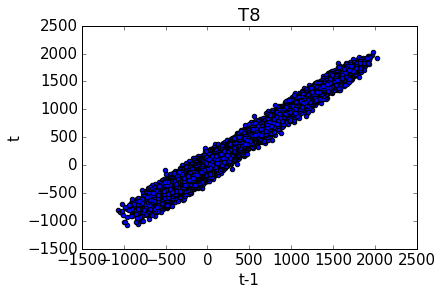

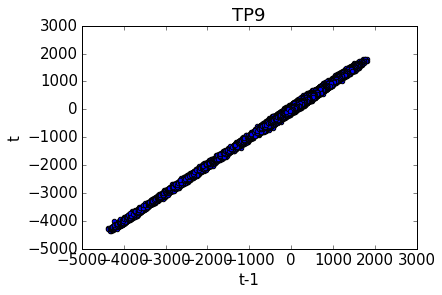

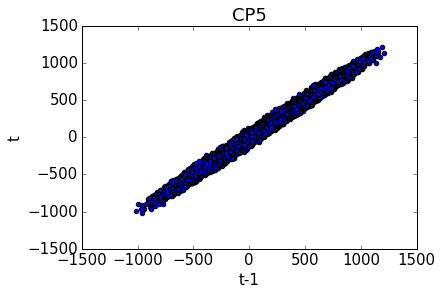

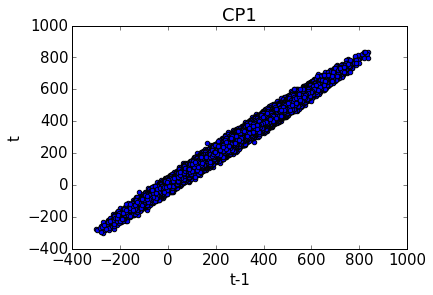

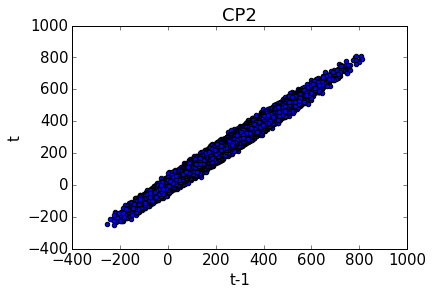

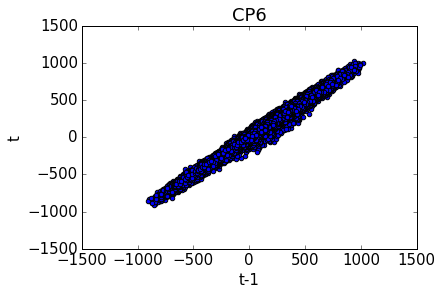

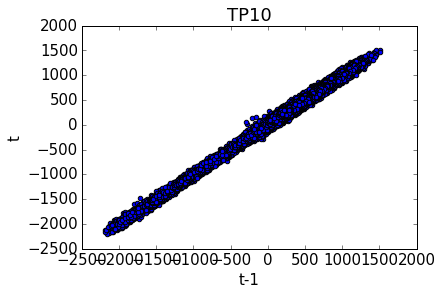

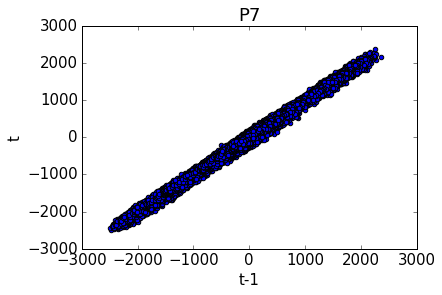

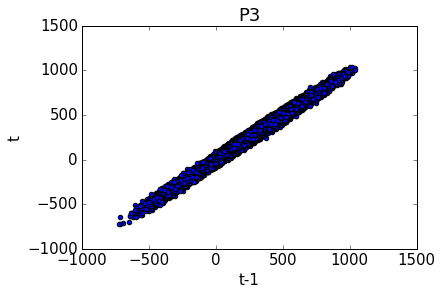

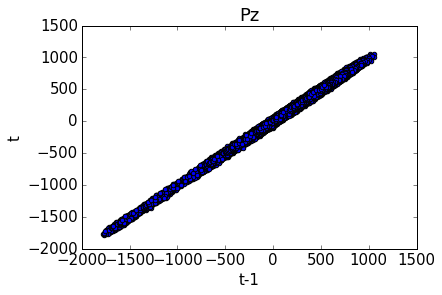

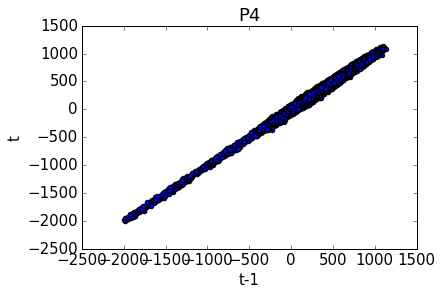

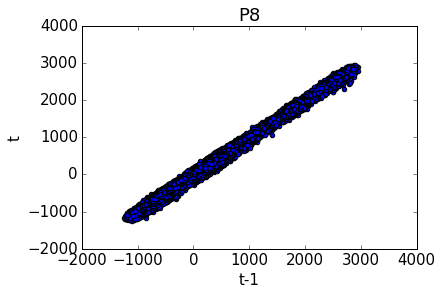

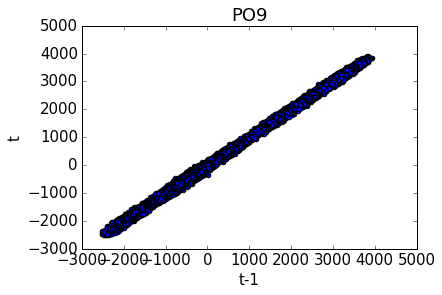

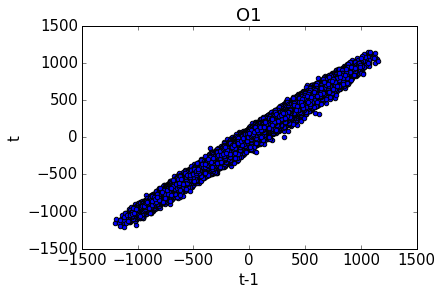

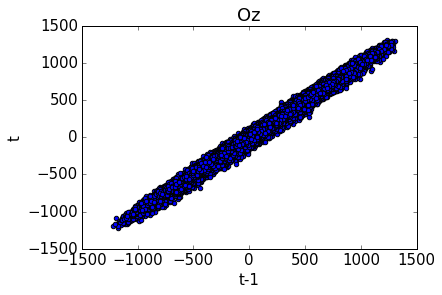

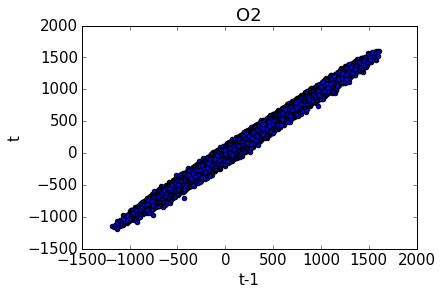

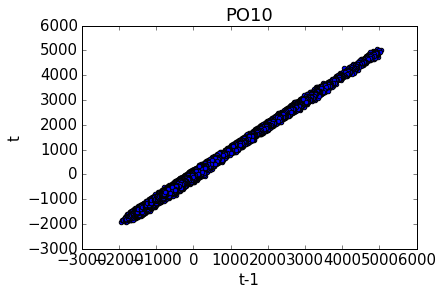

In [24]:
# autocorrelation plots
for col in series.columns:
    col_values = series[col].values
    plt.scatter(col_values[:-1], col_values[1:])
    plt.xlabel('t-1')
    plt.ylabel(r't')
    plt.title(col)
    plt.show()
    plt.close()

In [25]:
for i in range(series.shape[1]):
    print (np.corrcoef(series.values[1:, i], series.values[:-1, i])[0, 1])

0.998940425831
0.997961070462
0.997985234409
0.997577491317
0.999223988852
0.997312514677
0.992038611882
0.996397720278
0.997361615501
0.996124092923
0.983166697778
0.998610041804
0.987265261868
0.999178898417
0.998018860809
0.989239198035
0.998629059641
0.994957371407
0.991776739666
0.990245298156
0.994533986235
0.99692701983
0.997299744233
0.994383688353
0.998312998563
0.995552547933
0.996682757143
0.998833796796
0.992617829728
0.994492309311
0.996150817599
0.998777470135


In [26]:
covariance = np.cov(series.values.T)
corr = np.corrcoef(series.values.T)


for i in list(corr):
    print(i)

[ 1.          0.65870485  0.86448542  0.3752403   0.46470675  0.70774989
  0.73843369  0.70131195  0.43586139  0.56758546  0.6473848   0.43041518
  0.44311282  0.481258    0.30184866  0.58870164  0.65119408  0.41456586
  0.22108314 -0.03532609  0.20800969  0.5393224   0.43041863  0.35217449
  0.35756912 -0.19676479  0.36388747  0.62497181  0.24687205  0.22797614
  0.47389202  0.36451727]
[ 0.65870485  1.          0.50343594  0.18566769  0.02868684  0.68618293
  0.67755069  0.42884656  0.31292399  0.68957097  0.59651931  0.7227502
  0.33083898  0.39928859  0.64514861  0.82582354  0.37579405  0.69931529
 -0.00262399 -0.14736647  0.34527343  0.26272754  0.69205277  0.11532126
 -0.12881464 -0.11390012  0.79504633  0.72275785  0.61874117  0.00593482
  0.45967883  0.73464084]
[ 0.86448542  0.50343594  1.          0.40685942  0.51802455  0.492816
  0.67206253  0.76762119  0.37430188  0.31089074  0.68304757  0.25592499
  0.42867083  0.15641901  0.07127363  0.43881499  0.831071    0.49645111
  

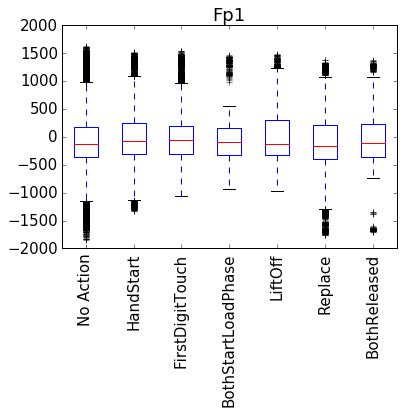

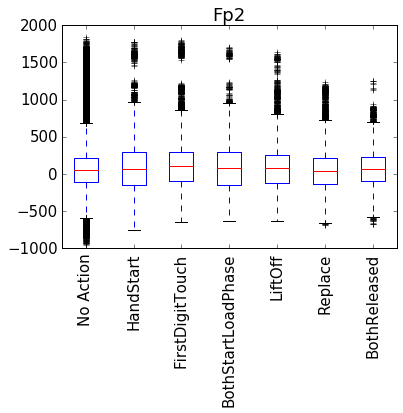

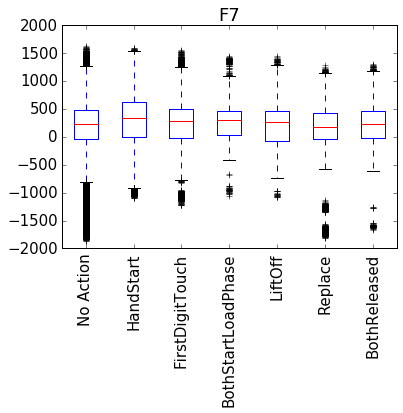

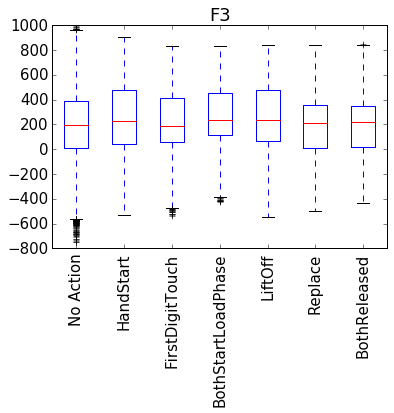

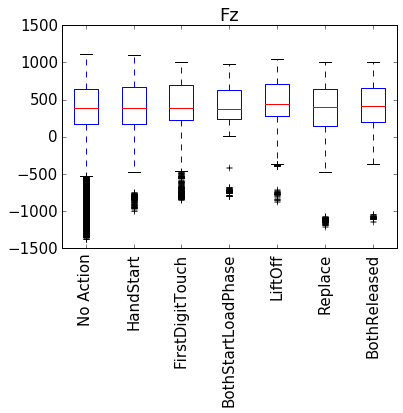

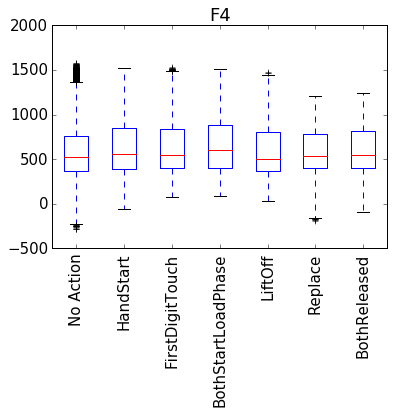

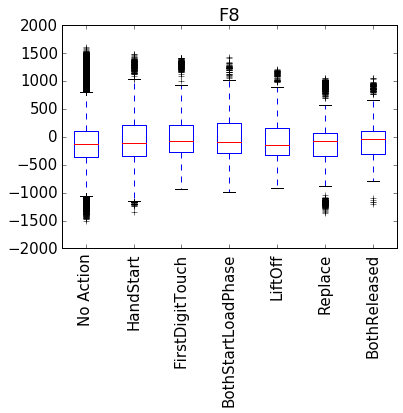

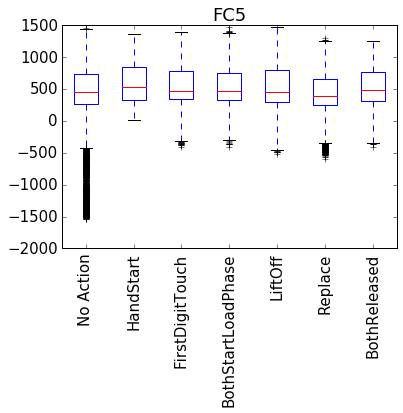

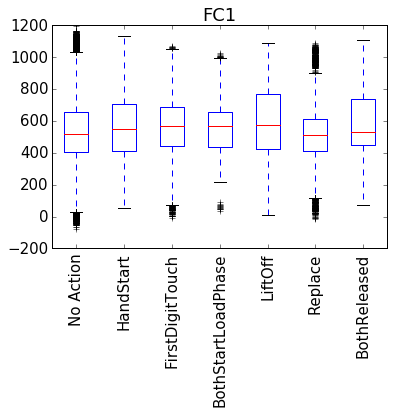

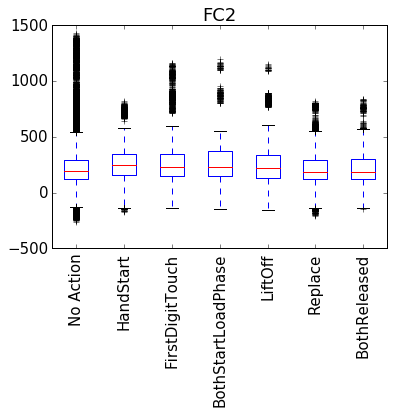

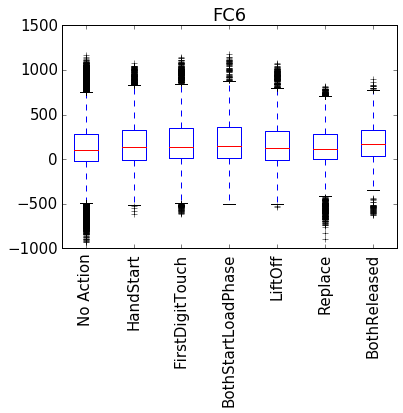

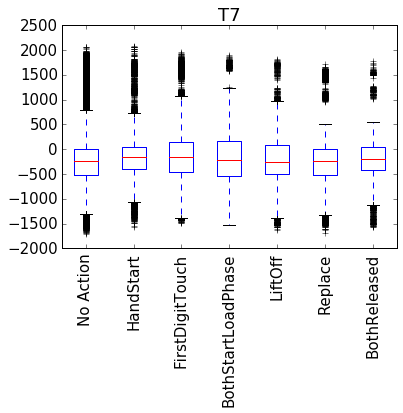

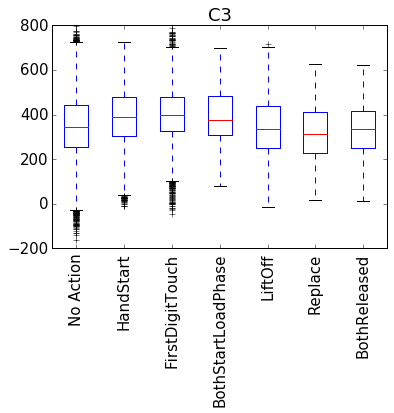

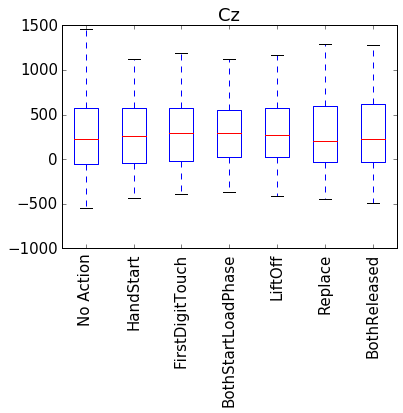

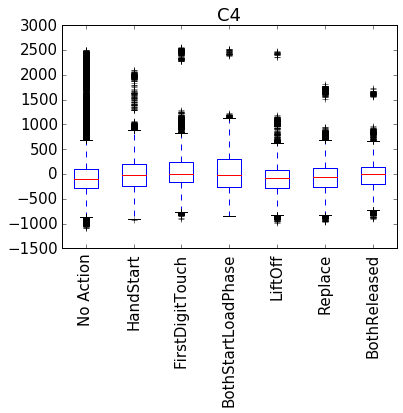

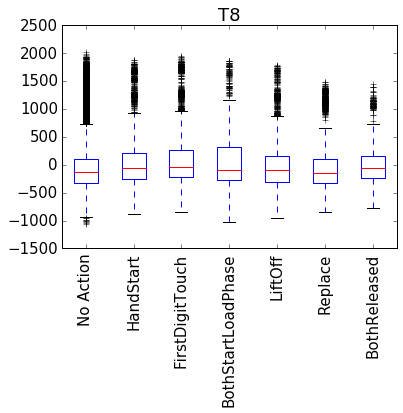

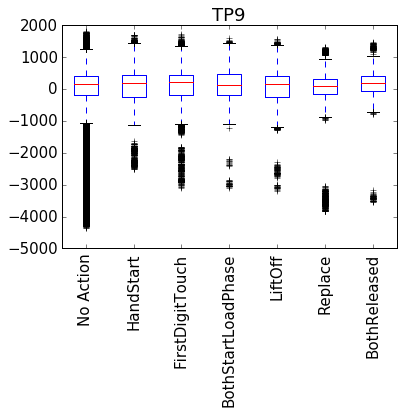

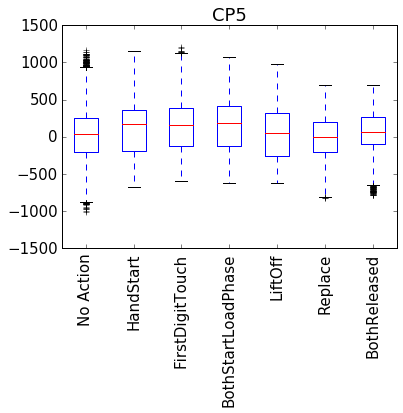

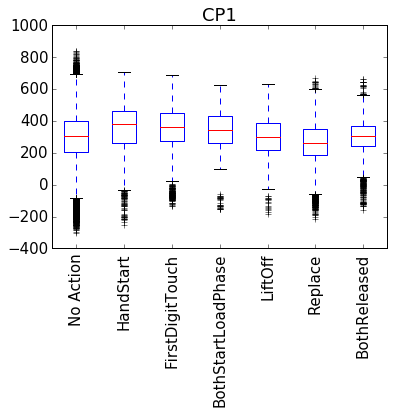

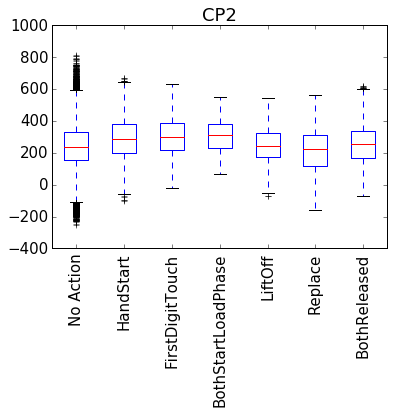

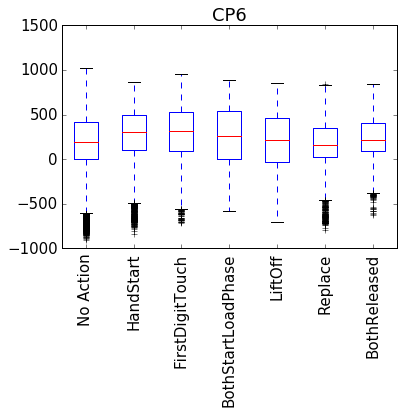

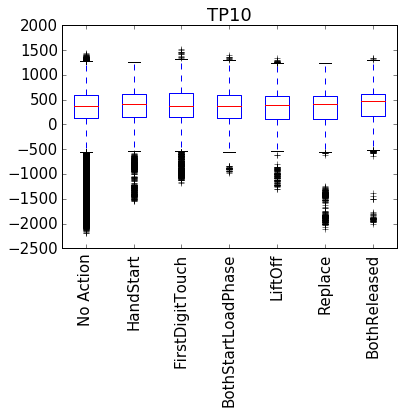

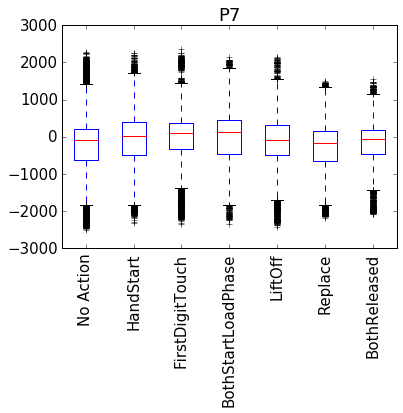

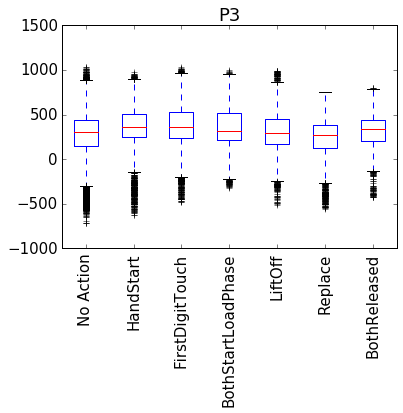

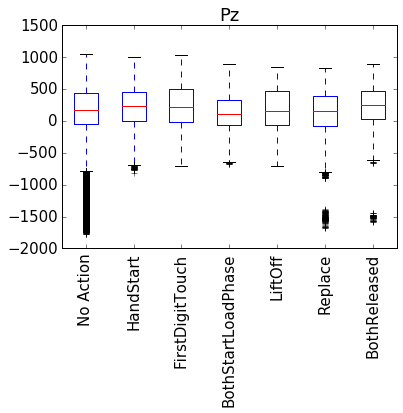

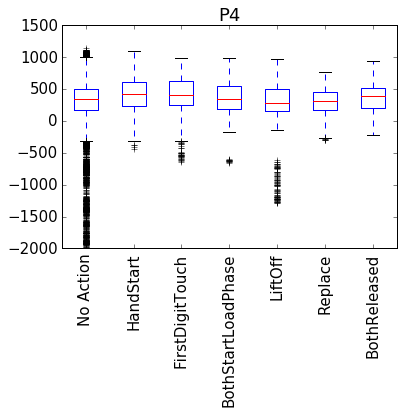

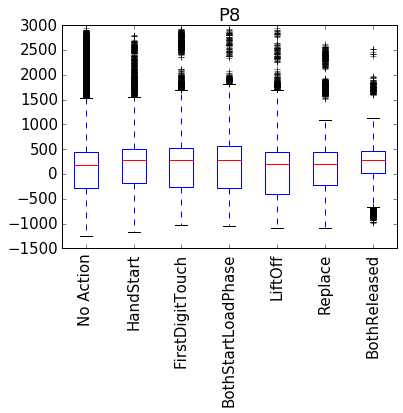

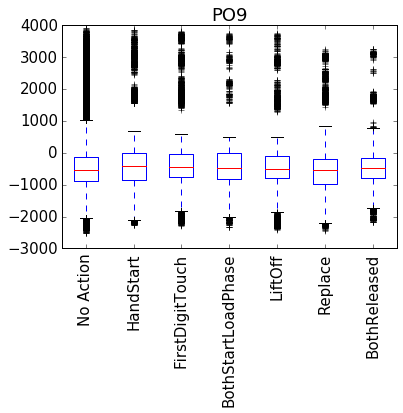

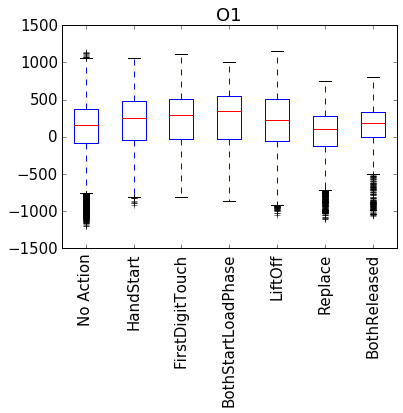

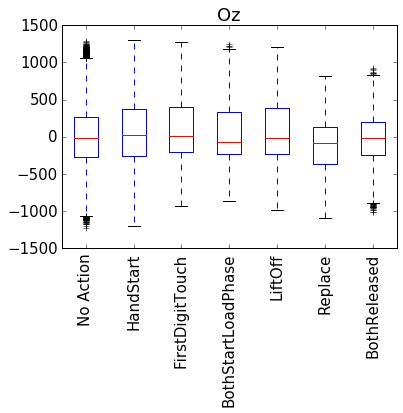

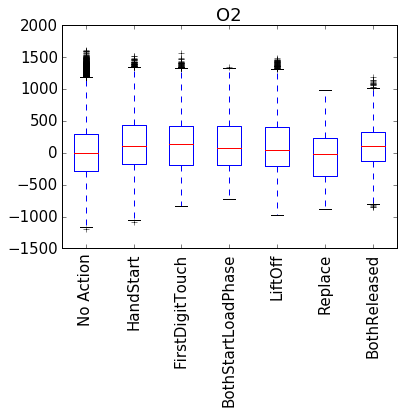

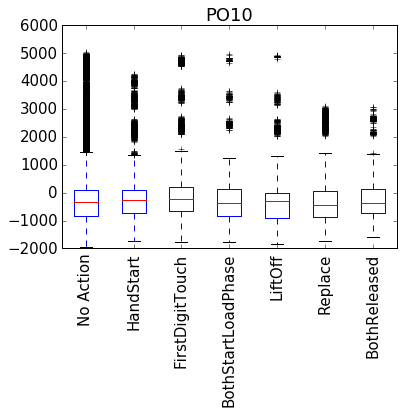

In [27]:
# distribution of the columns in the data split by features
num_classes = 7 # 6 activities plus no activity

for feature in series.columns:
    feature_by_label = []
    for i in range(num_classes):
        # for each class label, get the rows where the class happened
        indexes = np.where(labels == i)[0]
        feature_by_label.append(series[feature].values[indexes])
    plt.boxplot(feature_by_label)
    plt.title(feature)
    plt.xticks(locations[1:], names[:-1], rotation='vertical')
    plt.show()
    plt.close()

In [28]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X = series.values
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
# lr.predict_proba gives a probability for each class
y_prob = lr.predict_proba(X)
y_prob



array([[  9.47410665e-01,   7.10967456e-03,   1.77579051e-02, ...,
          1.54477752e-02,   1.17928483e-02,   8.46153588e-05],
       [  9.47709240e-01,   4.93409795e-03,   1.23516742e-02, ...,
          1.36057701e-02,   2.08357565e-02,   1.60754415e-04],
       [  9.53046527e-01,   4.79869388e-03,   8.98640882e-03, ...,
          1.46043186e-02,   1.80755818e-02,   1.68272296e-04],
       ..., 
       [  8.72822175e-01,   2.05418490e-02,   2.07667037e-02, ...,
          1.82244392e-02,   4.59423207e-02,   1.91509449e-02],
       [  8.83822757e-01,   1.87379999e-02,   1.61591944e-02, ...,
          1.61866288e-02,   4.31322852e-02,   1.95475883e-02],
       [  8.84735248e-01,   2.64261353e-02,   2.11389927e-02, ...,
          1.75413932e-02,   3.00654234e-02,   1.69084349e-02]])

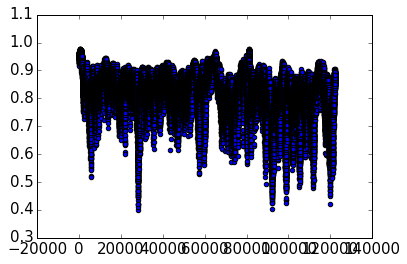

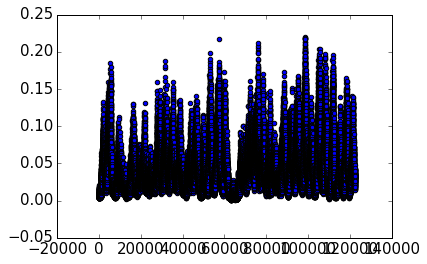

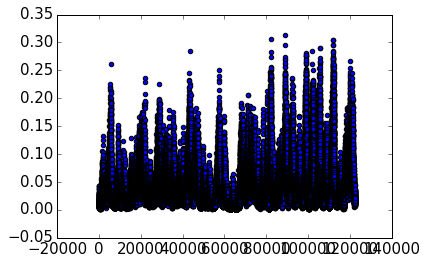

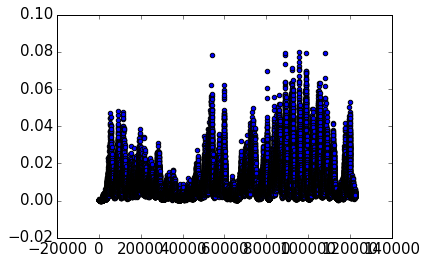

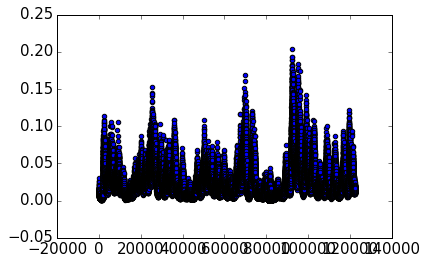

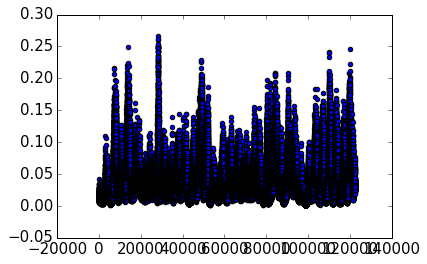

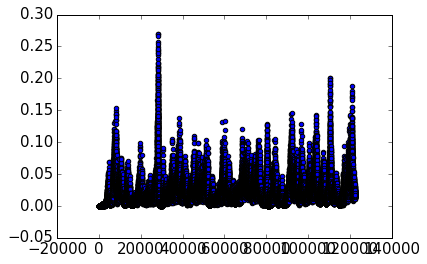

In [30]:
for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()


In [32]:
from sklearn.metrics import roc_auc_score 

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')


No Action: 0.596748055738
HandStart: 0.696883909024
FirstDigitTouch: 0.719856315924
BothStartLoadPhase: 0.714252442102
LiftOff: 0.70613256819
Replace: 0.699319035718
BothReleased: 0.715666754317


In [34]:
def extract_features(ts):
    """
    ts is the time series of labels as a numpy array
    """
    last_state = 0
    last_state_nz = 6
    time_since_last_nz = 2
    duration_of_cur_state = 1
    X = []
    for i in range(len(ts)):
        cur_state = ts[i]
        X.append([last_state, last_state_nz, time_since_last_nz, duration_of_cur_state])
        
        if last_state == cur_state:
            duration_of_cur_state += 1
        else:
            duration_of_cur_state = 0
        if cur_state != 0:
            last_state_nz = cur_state
            time_since_last_nz = 1
        else:
            time_since_last_nz += 1
        last_state = cur_state
    X = np.array(X)
    return X

X = extract_features(labels)

lr = LogisticRegression()
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

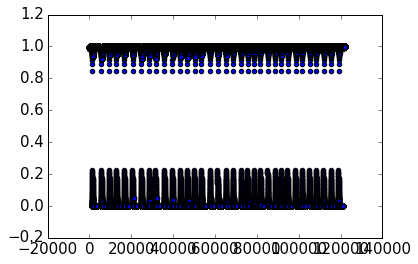

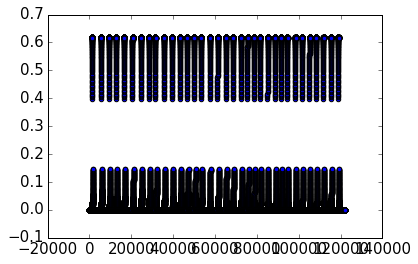

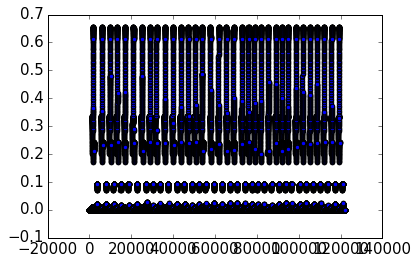

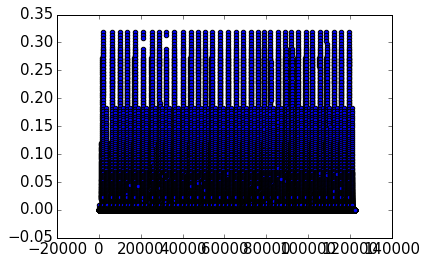

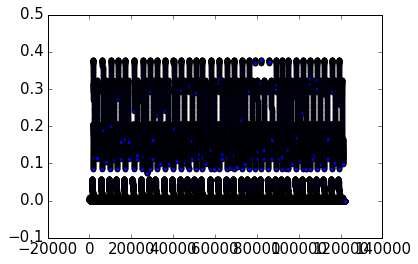

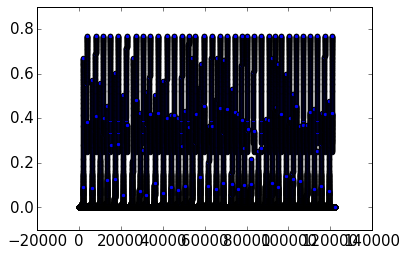

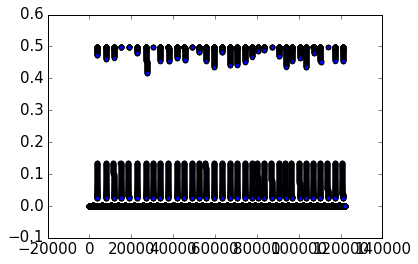

In [35]:
y_prob = lr.predict_proba(X)

for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()

In [36]:
from sklearn.metrics import roc_auc_score

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')

No Action: 0.99833994986
HandStart: 0.995990252812
FirstDigitTouch: 0.998189694444
BothStartLoadPhase: 0.983517218181
LiftOff: 0.98485778364
Replace: 0.992925194745
BothReleased: 0.999162772787


In [37]:
from sklearn.metrics import precision_recall_fscore_support
y_true = labels
y_pred = np.argmax(y_prob, axis=1)
prec, rec, fscore, supp = precision_recall_fscore_support(y_true, y_pred)
print ("Precision:", ["%.3f" % i for i in prec])
print ("Recall:", ["%.3f" % i for i in rec])
print ("F-1 Score:", ["%.3f" % i for i in fscore])


Precision: ['0.999', '0.993', '0.839', '0.985', '0.842', '0.737', '0.989']
Recall: ['0.999', '0.993', '0.993', '0.122', '0.475', '0.940', '0.963']
F-1 Score: ['0.999', '0.993', '0.909', '0.217', '0.607', '0.826', '0.976']
